## *Welcome to Parallelized Scalable Simulation of Biological Neural Networks - A Tutorial*

### Abstract

The dynamics of neurons and their networks have been studied extensively by modelling them as collections of differential equations and the power of these mathematical tools are well recognized. Many tools and packages exist that allow the simulation of systems of neurons using these differential equations. But most of these tools are very specialized and the nature of the implementation of these tools makes them less flexible and limit their abilities. TensorFlow is a Python-based interface originally designed for machine learning algorithms but it presents a scalable environment for a variety of computation including solving differential equations using iterative algorithms from numerical analysis such as Runge-Kutta methods. There are two major benefits of such an implementation: high readability and scalability across a variety of computational devices. We explore the process of implementing a scalable simulation of a system of neurons based on Hodgkin-Huxley-like neuron equations using TensorFlow. We also discuss the limitations of such an implementation and approaches to deal with them. 

### Motivation

The processing of information by the nervous system spans across space and time and mathematical modelling of these dynamics have found to be a very important tool. These models have been used extensively to study the dynamics and mechanisms of information processing at both the individual neuron level and the system of neurons level. These models generally utilize systems of simultaneous ordinary differential equations (ODEs) which can be solved as initial value problems using well studied methods from numerical analysis such as Runge Kutta methods. From detailed study of the mechanism of action of the neurons, ion channels, neurotransmitters or neuromodulators and their dynamics in different models, equations have been found that describe the behavior of neurons and synapse. By forming interconnected systems of these individual groups of differential equations, the overall dynamics and behavior of networks can be studied through deterministic or stochastic simulations which can be easily perturbed unlike the case for in vivo experiments.

A major issue with such simulations is the computational complexity. As the number of neurons increase, the number of possible synaptic connections increases quadratically. That is, for a system of $n$ neurons there can be at most $n^2$ different synapses of one type, each with its own set of equations. Thus, simulations can take very long times for large values of $n$. A solution to this problem is to implement some form of parallelization in the ODE solver and the system of equations itself. One of the simplest methods of parallelizable computation is in the form of matrix algebra which can easily be accelerated using libraries such as BLAS. But BLAS can only be used for CPU based computational engines.

This is where TensorFlow (a open-source google product) gives us an massive edge. TensorFlow allows us a much greater scalability and is way more flexible in terms of ease of implementation for specialized hardware. With minimal changes in the implementation, the code can be executed on a wide variety of heterogeneous and distributed systems ranging from mobile devices to clusters and specialised computing devices such as GPU and TPU cards. The modern advances in GPU/TPU design allows us to access even higher degrees of parallelization. It is now even possible to have hundred of TeraFLOPS of computing power in a single small computing device. With TensorFlow we can access these resources without even requiring an in-depth understanding of its architecture and technical knowledge of specific low level packages like CUDA.

## Day 1: Of Numerical Integration, Python and Tensorflow

Welcome to Day 1! Today, we start with our discussion of what Numerical Integration is and how we can use it to solve differential equations given the initial condition in both Python and Tensorflow.

### What is Numerical Integration?

From the point of view of a theoretician, the ideal form of the solution to a differential equation given the initial conditions, i.e. an initial value problem (IVP), would be a formula for the solution function. But sometimes obtaining a formulaic solution is not always easy, and in many cases is absolutely impossible. So, what do we do when faced with a differential equation that we cannot solve? If you are only looking for long term behavior of a solution you can always sketch a direction field. This can be done without too much difficulty for some fairly complex differential equations that we can’t solve to get exact solutions. But, what if we need to determine how a specific solution behaves, including some values that the solution will take? In that case, we have to rely on numerical methods for solving the IVP such as euler's method or the Runge-Kutta Methods. 

#### Euler's Method

We use Euler's Method to generate a numerical solution to an initial value problem of the form:

$$\frac{dx}{dt} = f(x, t)$$
$$x(t_o) = x_o$$

Firstly, we decide the interval over which we desire to find the solution, starting at the initial condition. We break this interval into small subdivisions of a fixed length $\epsilon$. Then, using the initial condition as our starting point, we generate the rest of the solution by using the iterative formulas:

$$t_{n+1} = t_n + \epsilon$$
$$x_{n+1} = x_n + \epsilon f(x_n, t_n)$$

to find the coordinates of the points in our numerical solution. We end this process once we have reached the end of the desired interval.

To see a graphical and mathematical derivation of the same visit: http://calculuslab.deltacollege.edu/ODE/7-C-1/7-C-1-h-a.html

#### Euler and Python
Let $\frac{dx}{dt}=f(x,t)$, we want to find $x(t)$ over $t\in[0,2)$, given that $x(0)=1$ and $f(x,t) = 5x$. The exact solution of this equation would be $x(t) = e^{5t}$.


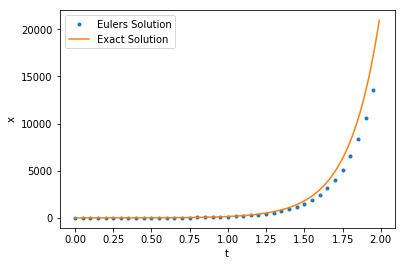

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x,t): # define the function f(x,t)
    return 5*x

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros(t.shape) # define an array for x

x[0]= 1 # set initial condition

for i in range(1,t.shape[0]):
    x[i] = epsilon*f(x[i-1],t[i-1])+x[i-1] # Euler Integration Step
    
plt.plot(t[::5],x[::5],'.',label="Eulers Solution") # Plot every fifth point
plt.plot(t,np.exp(5*t),label="Exact Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### Euler and Vectors

Euler's Method also applies to vectors and can solve simultaneous differential equations.

The Initial Value problem now becomes:

$$\frac{d\vec{x}}{dt} = \vec{f}(\vec{x}, t)$$
$$\vec{x}(t_o) = \vec{x_o}$$

where $\vec{x}=[x_1,x_2...]$ and $\vec{f}(\vec{x}, t)=[f_1(\vec{x}, t),f_2(\vec{x}, t)...]$.

The Euler's Method becomes:

$$t_{n+1} = t_n + \epsilon$$
$$\vec{x_{n+1}} = \vec{x_n} + \epsilon \vec{f}(\vec{x_n}, t_n)$$

Let $\frac{d\vec{x}}{dt}=f(\vec{x},t)$, we want to find $\vec{x}(t)$ over $t\in[0,2)$, given that $\vec{x}=[x,y]$, $\vec{x}(0)=[1,0]$ and $f(\vec{x},t) = [x-y,y-x]$.

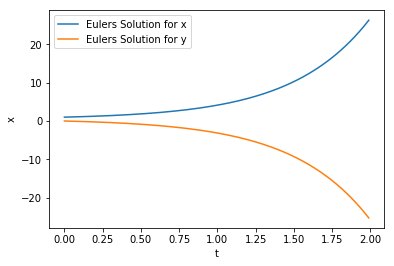

In [2]:
def f(x,t): # define the function f(x,t)
    x_,y_ = x
    return np.array([x_-y_,y_-x_])

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros((2,t.shape[0])) # define an array for x

x[:,0]= [1,0] # set initial condition

for i in range(1,t.shape[0]):
    x[:,i] = epsilon*f(x[:,i-1],t[i-1])+x[:,i-1] # Euler Integration Step
    
plt.plot(t,x[0,:],label="Eulers Solution for x")
plt.plot(t,x[1,:],label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### A Generalized function for Euler Integration

Now, we create a generalized function that takes in 3 inputs ie. the function $f(\vec{y},t)$ when $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and initial vector $\vec{y_0}$.

##### Algorithm
- Get the required inputs: function $\vec{f}(\vec{x},t)$, initial condition vector $\vec{y_0}$ and time series $t$.
- Check if t is monotonically increasing. Entering a time series $t$ allows for greater control over $\epsilon$ as it can now vary for each timestep. The only difference in the Euler's Method is now : $\epsilon\rightarrow\epsilon(t_n)$.
- Check if the input is of the correct datatype ie. floating point decimal.
- Create a zero matrix to hold the output.
- For each timestep, perform the euler method updation with variable $\epsilon$ and store it in the output matrix.
- Return the output timeseries matrix.

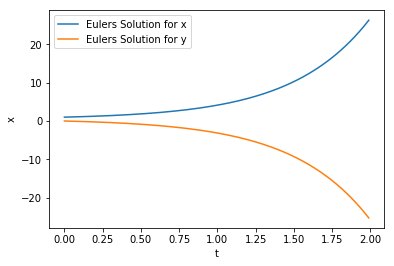

In [3]:
def check_increasing(t): # Ensure Time is Monotonically Increasing
    return np.all(t[1:]>t[:-1])

def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0
        
        for i in range(time_delta_grid.shape[0]):
            y[:,i+1]= time_delta_grid[i]*func(y[:,i],t[i])+y[:,i]
        return y


def odeint_euler(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_increasing(t) and check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")
        
solution = odeint_euler(f,[1.,0.],t)

plt.plot(t,solution[0,:],label="Eulers Solution for x")
plt.plot(t,solution[1,:],label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

### An Introduction to TensorFlow

TensorFlow is an open-source software library. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google’s Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well!

Essentially, TensorFlow library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers. It is a python package that (much like BLAS on Intel MKL) speeds up Linear Algebra Computation. What is special about this system is that it is capable of utilizing GPUs and TPUs for computation and its written in a simpler language like python.

#### Why GPU/TPU vs CPU?

<img src="GPUvCPU.png" alt="GPUvCPU.png" width="600"/>

The answer lies in the architecture: 
**CPU = Faster per Core Processing, Slow but Large Memory Buffer, Few Cores**
**GPU/TPU = Slower Processing, Faster but Smaller Memory Buffer, Many Cores**

Thus GPUs and TPUs are optimized for large number of simple calculations done parallely. The extent of this  parallelization makes it suitable for vector/tensor manipulation.


For an Introduction to Computational Graphs in Tensorflow, Visit:
https://www.geeksforgeeks.org/introduction-to-tensorflow/

#### Euler Integration Function in TensorFlow

Transitioning to TensorFlow is not a trivial process, but once you get a gist of how it works, it is as simple as using numpy. Because of the way the TensorFlow architecture is designed, there are a few limitations to how one can do simpler operations/manipulation. But it is easy to overcome using the correct function and code patterns which can be easily learnt.

In [4]:
# Firstly, import TensorFlow

import tensorflow as tf

# TensorFlow Boolean variables are not easy to directly use for flow control.
# Thus instead of using an if statement we raise an error / use a control dependency

def tf_check_type(t, y0): # Ensure Input is Correct
    
    if not (y0.dtype.is_floating and t.dtype.is_floating): 
        # The datatype of any tensor t is accessed by t.dtype
        raise TypeError('Error in Datatype')

def tf_check_increasing(t): # Ensure Time is Monotonically Increasing
    
    assert_op = tf.Assert(tf.reduce_all(t[1:]>t[:-1]),["Time must be monotonic"])
    # Asserting a control dependency is essentially forcing a requirement
    return tf.control_dependencies([assert_op])

class _Tf_Integrator():
    
    def integrate(self, func, y0, t): 
        
        time_delta_grid = t[1:] - t[:-1]  
        
        # tf.scan(fn,el,init) is an iterator over elems, it applies fn recursively on tensor init
        # fn is function takes in two inputs: accumulated fn and the value of current iteration on el
        # it must return an output structurally identical to the input to fn to allow recursion
        # the values of el (here time and delta time) act as additional information over recursion
        
        scan_func = self._make_scan_func(func)
        
        # iterate over (t,dt) till the 2nd last iteration
        
        y = tf.scan(scan_func, (t[:-1], time_delta_grid),y0) 
        return tf.concat([[y0], y], axis=0)
    
    def _make_scan_func(self, func): # create and return a stepper function fn
        def scan_func(y, t_dt): 
            t, dt = t_dt
            dy = dt*func(y,t)
            dy = tf.cast(dy, dtype=y.dtype) # Cast to correct type as failsafe
            return y + dy
        return scan_func
    

def tf_odeint_euler(func, y0, t):
    
    # Convert input to TensorFlow Objects
    
    t = tf.convert_to_tensor(t, preferred_dtype=tf.float64, name='t')
    y0 = tf.convert_to_tensor(y0, name='y0')
    tf_check_type(y0,t)
    with tf_check_increasing(t):
        return _Tf_Integrator().integrate(func,y0,t)

In [5]:
# Define a function using Tensorflow math operations. This creates a computational graph.

def f(X,t):
    x = X[:-1]
    y = X[1:]
    out = tf.concat([x-y,y-x],0)
    return out

y0 = tf.constant([1,0], dtype=tf.float64)

epsilon = 0.01
t = np.arange(0,2,epsilon)

# Define the final value (output of scan) that we wish to compute as a variable

state = tf_odeint_euler(f,y0,t)

# Start a TF session and evaluate state
with tf.Session() as sess:
    state = sess.run(state)

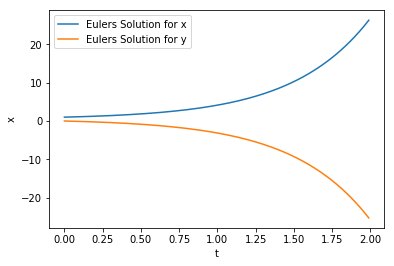

In [6]:
plt.plot(t,state.T[0,:],label="Eulers Solution for x")
plt.plot(t,state.T[1,:],label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

Congratulations! Now you know how to implement a simple Euler's method in Python and TensorFlow.

## Day 2: Advanced Integration

Welcome to Day 2! Today, we start with our discussion with an Advanced Numerical Integration technique known as the Runge Kutta method.

#### What is Runge Kutta method?

The formula for the Euler method is $x_{n+1}=x_n + \epsilon f(x_n,t_n)$ which takes a solution from $t_n$ to $t_{n+1}=t_n+\epsilon$. One might notice there is an inherent assymetry in the formula. It advances the solution through an interval $\epsilon$, but uses the derivative information at only the start of the interval. This results in an error in the order of $O(\epsilon^2)$. But, what if we take a trial step and evaluate the derivative at the midpoint of the update interval to evaluate the value of $y_{n+1}$? Take the equations:

$$k_1=\epsilon f(x_n,t_n)$$

$$k_2=\epsilon f(x_n+\frac{k_1}{2},t_n+\frac{\epsilon}{2})$$ 

$$y_{n+1}=y_n+k_2+O(\epsilon^3)$$

The symmetrization removes the O(\epsilon^2) error term and now the method is second order and called the second order Runge-Kutta method or the midpoint method. But we do not have to stop here. By further rewriting the equation, we can cancel higher order error terms and reach the most commonly used fourth-order Runge-Kutta Methods or RK4 method, which is described below:

$$k_1=f(x_n,t_n)$$

$$k_2=f(x_n+\epsilon\frac{k_1}{2},t_n+\frac{\epsilon}{2})$$

$$k_3=f(x_n+\epsilon\frac{k_2}{2},t_n+\frac{\epsilon}{2})$$

$$k_4=f(x_n+\epsilon k_3,t_n+\epsilon)$$

$$x_{n+1}=x_n+\frac{\epsilon}{6}(k_1+2 k_2+2 k_3+k_4)+O(\epsilon^5)$$

This method is what we will use to simulate our networks.


#### RK4 and Python
We perform the exact same integration that we had done with Euler's Method. Let $\frac{dx}{dt}=f(x,t)$, we want to find $x(t)$ over $t\in[0,2)$, given that $x(0)=1$ and $f(x,t) = 5x$. The exact solution of this equation would be $x(t) = e^{5t}$.

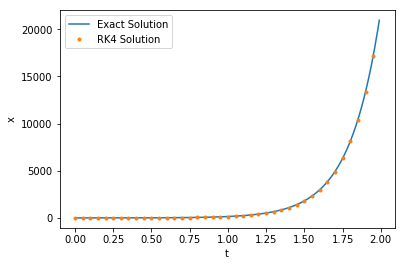

In [7]:
def f(x,t): # define the function f(x,t)
    return 5*x

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros(t.shape) # define an array for x (RK4 Method)

x[0]= 1 # set initial condition

for i in range(1,t.shape[0]):
    
    k1 = f(x[i-1], t[i-1])                               # RK4 Integration Steps
    half_step = t[i-1] + epsilon / 2
    k2 = f(x[i-1] + epsilon * k1 / 2, half_step)
    k3 = f(x[i-1] + epsilon * k2 / 2, half_step)
    k4 = f(x[i-1] + epsilon * k3, t[i-1] + epsilon)
    x[i]= (k1 + 2 * k2 + 2 * k3 + k4) * (epsilon / 6) + x[i-1]
    
    
plt.plot(t,np.exp(5*t),label="Exact Solution")
plt.plot(t[::5],x[::5],'.',label="RK4 Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

As you can see, Euler Method accumulated error much faster than RK4, thus despite being more computationally complex, the RK4 method offers more accurate numerical integration.

#### RK4 and Vectors

Just like Euler's Method, the Runge Kutta Method also applies to vectors and can be used to solve simultaneous differential equations

Let $\frac{d\vec{x}}{dt}=f(\vec{x},t)$, we want to find $\vec{x}(t)$ over $t\in[0,2)$, given that $\vec{x}=[x,y]$, $\vec{x}(0)=[1,0]$ and $f(\vec{x},t) = [x-y,y-x]$.

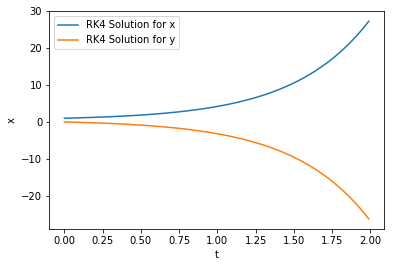

In [8]:
def f(x,t): # define the function f(x,t)
    x_,y_ = x
    return np.array([x_-y_,y_-x_])

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros((2,t.shape[0])) # define an array for x

x[:,0]= [1,0] # set initial condition

for i in range(1,t.shape[0]):    
    k1 = f(x[:,i-1], t[i-1])                               # RK4 Integration Steps
    half_step = t[i-1] + epsilon / 2
    k2 = f(x[:,i-1] + epsilon * k1 / 2, half_step)
    k3 = f(x[:,i-1] + epsilon * k2 / 2, half_step)
    k4 = f(x[:,i-1] + epsilon * k3, t[i-1] + epsilon)
    x[:,i]= (k1 + 2 * k2 + 2 * k3 + k4) * (epsilon / 6) + x[:,i-1]
    
plt.plot(t,x[0,:],label="RK4 Solution for x")
plt.plot(t,x[1,:],label="RK4 Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### A Generalized function for RK4 Integration

Just like we had created a function for Euler Integration in Python, we create a generalized function for RK4 that takes in 3 inputs ie. the function $f(\vec{y},t)$ when $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and initial vector $\vec{y_0}$.

The algorithm for this function is identical to the one we made for Euler Method with just the Euler Updation step replaced by the RK4 step.

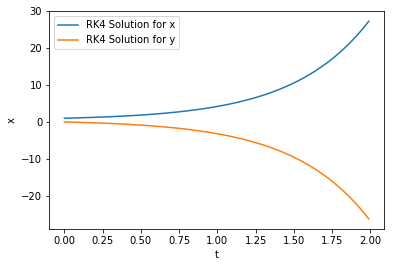

In [9]:
## This is essentially identical to what we had done in day 1 with Euler steps replaced by RK4 steps

def check_increasing(t): # Ensure Time is Monotonically Increasing
    return np.all(t[1:]>t[:-1])

def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0
        
        for i in range(time_delta_grid.shape[0]):
            k1 = func(y[:,i], t[i])                               # RK4 Integration Steps
            half_step = t[i] + time_delta_grid[i] / 2
            k2 = func(y[:,i] + time_delta_grid[i] * k1 / 2, half_step)
            k3 = func(y[:,i] + time_delta_grid[i] * k2 / 2, half_step)
            k4 = func(y[:,i] + time_delta_grid[i] * k3, t + time_delta_grid[i])
            y[:,i+1]= (k1 + 2 * k2 + 2 * k3 + k4) * (time_delta_grid[i] / 6) + y[:,i]

        return y


def odeint_rk4(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_increasing(t) and check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")
        
solution = odeint_rk4(f,[1.,0.],t)

plt.plot(t,solution[0,:],label="RK4 Solution for x")
plt.plot(t,solution[1,:],label="RK4 Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

### Back to TensorFlow

#### RK4 Integration Function in TensorFlow

Now, we implement the exact same RK4 integrator in TensorFlow.

In [10]:
import tensorflow as tf

def tf_check_type(t, y0): # Ensure Input is Correct
    if not (y0.dtype.is_floating and t.dtype.is_floating):
        raise TypeError('Error in Datatype')

def tf_check_increasing(t): # Ensure Time is Monotonically Increasing
    assert_op = tf.Assert(tf.reduce_all(t[1:]>t[:-1]),["Time must be monotonic"])
    return tf.control_dependencies([assert_op])

class _Tf_Integrator():
    
    def integrate(self, func, y0, t): 
        time_delta_grid = t[1:] - t[:-1]
        scan_func = self._make_scan_func(func)
        y = tf.scan(scan_func, (t[:-1], time_delta_grid),y0)
        return tf.concat([[y0], y], axis=0)
    
    def _make_scan_func(self, func): # stepper function
        def scan_func(y, t_dt): 
            t, dt = t_dt
            dy = self._step_func(func,t,dt,y) # Make code more modular.
            dy = tf.cast(dy, dtype=y.dtype) # Failsafe
            return y + dy
        return scan_func
    
    def _step_func(self, func, t, dt, y):
        k1 = func(y, t)
        half_step = t + dt / 2
        dt_cast = tf.cast(dt, y.dtype) # Failsafe

        k2 = func(y + dt_cast * k1 / 2, half_step)
        k3 = func(y + dt_cast * k2 / 2, half_step)
        k4 = func(y + dt_cast * k3, t + dt)
        return tf.add_n([k1, 2 * k2, 2 * k3, k4]) * (dt_cast / 6)
    

def tf_odeint_rk4(func, y0, t):
    t = tf.convert_to_tensor(t, preferred_dtype=tf.float64, name='t')
    y0 = tf.convert_to_tensor(y0, name='y0')
    tf_check_type(y0,t)
    with tf_check_increasing(t):
        return _Tf_Integrator().integrate(func,y0,t)

In [11]:
def f(X,t):
    x = X[:-1]
    y = X[1:]
    out = tf.concat([x-y,y-x],0)
    return out

y0 = tf.constant([1,0], dtype=tf.float64)

epsilon = 0.01
t = np.arange(0,2,epsilon)

state = tf_odeint_rk4(f,y0,t)

with tf.Session() as sess:
    state = sess.run(state)

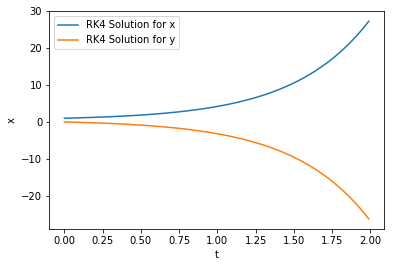

In [12]:
plt.plot(t,state.T[0,:],label="RK4 Solution for x")
plt.plot(t,state.T[1,:],label="RK4 Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## Day 3: Cells in Silicon

Welcome to Day 3! Today, we start with our discussion with the Hodgkin Huxley Neurons and how we can simulate them in python using Tensorflow and Numerical Integration.

### What is the Hodgkin Huxley Neuron Model? 
(Modified from Neuronal Dynamics, EPFL)

Hodgkin and Huxley performed many experiments on the giant axon of the squid and found three different types of ion currents - sodium, potassium, and a leak current. They found that specific voltage-dependent ion channels, for sodium and for potassium, control the flow of those ions through the cell membrane from different electrophysiology studies involving phamacological blocking of ion channels. The leak current essentially takes care of other channel types which are not described explicitly. 

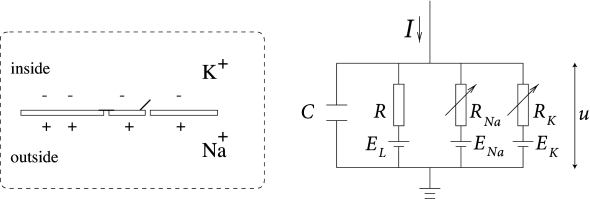

The Hodgkin-Huxley model of neurons can easily be understood with the help of a circuit diagram. The semipermeable cell membrane separates the interior of the cell from the extracellular liquid and acts as a capacitor. If an input current I(t) is injected into the cell, it may add further charge on the capacitor, or leak through the channels in the cell membrane. Because of active ion transport through the cell membrane, the ion concentration inside the cell is different from that in the extracellular liquid. The Nernst potential generated by the difference in ion concentration is represented by a battery.

Let us now translate the above considerations into mathematical equations. The conservation of electric charge on a piece of membrane implies that the applied current $I(t)$ may be split in a capacitive current $I_C$ which charges the capacitor $C_m = 1 \mu F/cm^2$ and further components $I_k$ which pass through the ion channels. Thus $I(t) = I_C(t) + \sum_kI_k(t)$ where the sum runs over all ion channels. 

In the standard Hodgkin-Huxley model, there are only three types of channel: a Sodium channel, a Potassium channel and an unspecific leakage channel. From the definition of a capacitance $C_m=\frac{q}{u}$, $I_C=C_m\frac{du}{dt}$ where $q$ is a charge and $u$ the voltage across the capacitor. Thus the model becomes:

$$C_m\frac{du}{dt}=−I_{Na}(t)−I_{K}(t)−I_{L}(𝑡)+I(t)$$

In biological terms, $u$ is the voltage across the membrane. Hogkin and Huxley found the Na and K ion currents to be dependent on the voltage and of the form given below:

$$I_{Na} = g_{Na}m^3h(u−E_{Na})$$

$$I_K = g_Kn^4(u−E_K)$$

$$I_L = g_L(u−E_L)$$

where $E_{Na}=50\ mV$, $E_K = -95\ mV$ and $E_L=-55\ mV$ are the reversal potentials; $g_{Na} = 100\ \mu S/cm^2$, $g_K = 10\ \mu S/cm^2$ and $g_L = 0.15\ \mu S/cm^2$ are the channel conductances; and m,h, and n are gating variables that follow the dynamics given by:

$$\frac{dm}{dt} = - \frac{1}{\tau_m}(m-m_0)$$

$$\frac{dh}{dt} = - \frac{1}{\tau_h}(h-h_0)$$

$$\frac{dn}{dt} = - \frac{1}{\tau_n}(n-n_0)$$

where $\tau_m$, $\tau_h$ and $\tau_n$ are voltage dependent time constants and $m_0$, $h_0$ and $n_0$ are voltage dependent asymptotic gating values. These functions are empirically determined for different types of neurons.

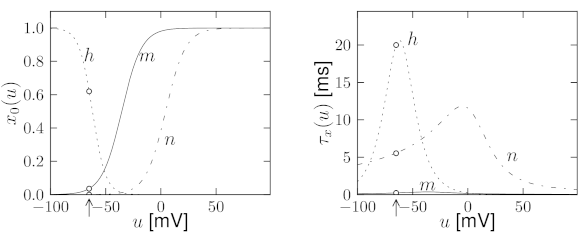

#### Recalling the Generalized TensorFlow Integrator
On day 2, we had created a RK4 based numerical integrator. We recall the implementation of the Integrator.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


def tf_check_type(t, y0): # Ensure Input is Correct
    if not (y0.dtype.is_floating and t.dtype.is_floating):
        raise TypeError('Error in Datatype')

def tf_check_increasing(t): # Ensure Time is Monotonically Increasing
    assert_op = tf.Assert(tf.reduce_all(t[1:]>t[:-1]),["Time must be monotonic"])
    return tf.control_dependencies([assert_op])

class _Tf_Integrator():
    
    def integrate(self, func, y0, t): 
        time_delta_grid = t[1:] - t[:-1]
        scan_func = self._make_scan_func(func)
        y = tf.scan(scan_func, (t[:-1], time_delta_grid),y0)
        return tf.concat([[y0], y], axis=0)
    
    def _make_scan_func(self, func): # stepper function
        def scan_func(y, t_dt): 
            t, dt = t_dt
            dy = self._step_func(func,t,dt,y) # Make code more modular.
            dy = tf.cast(dy, dtype=y.dtype) # Failsafe
            return y + dy
        return scan_func
    
    def _step_func(self, func, t, dt, y):
        k1 = func(y, t)
        half_step = t + dt / 2
        dt_cast = tf.cast(dt, y.dtype) # Failsafe

        k2 = func(y + dt_cast * k1 / 2, half_step)
        k3 = func(y + dt_cast * k2 / 2, half_step)
        k4 = func(y + dt_cast * k3, t + dt)
        return tf.add_n([k1, 2 * k2, 2 * k3, k4]) * (dt_cast / 6)
    

def odeint(func, y0, t):
    t = tf.convert_to_tensor(t, preferred_dtype=tf.float64, name='t')
    y0 = tf.convert_to_tensor(y0, name='y0')
    tf_check_type(y0,t)
    with tf_check_increasing(t):
        return _Tf_Integrator().integrate(func,y0,t)

#### Implementing the Dynamical Function for an Hodkin Huxley Neuron

Recall, a simple Hodgkin Huxley Neuron has a 4 main dynamical variables:

$V = Membrane\ Potential$  
$m = Sodium\ Activation\ Gating\ Variable$  
$h = Sodium\ Inactivation\ Gating\ Variable$  
$n = Potassium\ Channel\ Gating\ Variable$

And the dynamics are given by:

$$C_m\frac{dV}{dt} = I_{injected} - I_{Na} - I_K - I_L$$

$$\frac{dm}{dt} = - \frac{1}{\tau_m}(m-m_0)$$

$$\frac{dh}{dt} = - \frac{1}{\tau_h}(h-h_0)$$

$$\frac{dn}{dt} = - \frac{1}{\tau_n}(n-n_0)$$

where the values of $\tau_m$, $\tau_h$, $\tau_n$, $m_0$, $h_0$, $n_0$ are given from the equations mentioned earlier.

##### Step 1: Defining Parameters of the Neuron 

In [14]:
C_m = 1      

g_K = 10
E_K = -95

g_Na = 100
E_Na = 50 

g_L = 0.15
E_L = -55

##### Step 2: Defining functions that calculate $\tau_m$, $\tau_h$, $\tau_n$, $m_0$, $h_0$, $n_0$ 

Note: Always use Tensorflow functions for all mathematical operations.

In [15]:
def K_prop(V):
    T = 22
    phi = 3.0**((T-36.0)/10)
    V_ = V-(-50)
    
    alpha_n = 0.02*(15.0 - V_)/(tf.exp((15.0 - V_)/5.0) - 1.0)
    beta_n = 0.5*tf.exp((10.0 - V_)/40.0)
    
    t_n = 1.0/((alpha_n+beta_n)*phi)
    n_inf = alpha_n/(alpha_n+beta_n)
    
    return n_inf, t_n


def Na_prop(V):
    T = 22
    phi = 3.0**((T-36)/10)
    V_ = V-(-50)
    
    alpha_m = 0.32*(13.0 - V_)/(tf.exp((13.0 - V_)/4.0) - 1.0)
    beta_m = 0.28*(V_ - 40.0)/(tf.exp((V_ - 40.0)/5.0) - 1.0)
    
    alpha_h = 0.128*tf.exp((17.0 - V_)/18.0)
    beta_h = 4.0/(tf.exp((40.0 - V_)/5.0) + 1.0)
    
    t_m = 1.0/((alpha_m+beta_m)*phi)
    t_h = 1.0/((alpha_h+beta_h)*phi)
    
    m_inf = alpha_m/(alpha_m+beta_m)
    h_inf = alpha_h/(alpha_h+beta_h)
    
    return m_inf, t_m, h_inf, t_h

##### Step 3: Defining function that calculate Neuronal currents

In [16]:
def I_K(V, n):
    return g_K  * n**4 * (V - E_K)

def I_Na(V, m, h):
    return g_Na * m**3 * h * (V - E_Na)

def I_L(V):
    return g_L * (V - E_L)

##### Step 4: Define the function dA/dt where A is the State Vector

In [17]:
def dAdt(X, t):
    V = X[0:1]
    m = X[1:2]
    h = X[2:3]
    n = X[3:]
    
    dVdt = (5 - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    
    m0,tm,h0,th = Na_prop(V)
    n0,tn = K_prop(V)

    dmdt = - (1.0/tm)*(m-m0)
    dhdt = - (1.0/th)*(h-h0)
    dndt = - (1.0/tn)*(n-n0)

    out = tf.concat([dVdt,dmdt,dhdt,dndt],0)
    return out

##### Step 5: Define Initial Condition and Integrate

In [18]:
y0 = tf.constant([-71,0,0,0], dtype=tf.float64)

epsilon = 0.01
t = np.arange(0,200,epsilon)

state = odeint(dAdt,y0,t)

with tf.Session() as sess:
    state = sess.run(state)

##### Step 6: Plot Output

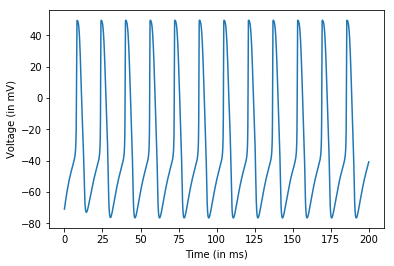

In [19]:
plt.plot(t,state.T[0,:])

plt.xlabel("Time (in ms)")
plt.ylabel("Voltage (in mV)")

plt.show()

#### Simulating Multiple Independent HH Neurons at the Same Time

Although, simulating a Single Hodgkin-Huxley Neuron is possible in TensorFlow, the real ability of tensorflow can be seen only when a large number of simultaneous diffential equations are to be solved at the the same time. Let's try to simulate 20 independent HH neurons with different input currents and characterise the firing rates. 

##### Methods of Parallelization
TensorFlow has the intrinsic ability to speed up any and all Tensor computations using available multi-cores, and GPU/TPU setups. There are two major parts of the code where TensorFlow can help us really speed up the computation:
1. **RK4 Steps:** Since the TensorFlow implementation of the Integrator utilizes Tensor calculations, TensorFlow will automatically speed it up.
2. **Functional Evaluations:** Looking at Dynamical Equations that describe the neuronal dynamics, its easy to notice that all simple HH Neurons share the same or atleast similar dynamical equations but will vary only in the values of parameters. We can exploit this to speed up the computations.


Say $\vec{X}=[x_1,x_2...x_m]$ is the state vector of a single neuron and its dynamics are defined by parameters $\vec{p}= [p_1,p_2...p_l]$ (l in number) equations of the form: $$\frac{d\vec{X}}{dt} = [f_1(\vec{X},\vec{p}),f_2(\vec{X},\vec{p})...f_m(\vec{X},\vec{p})]$$ We have to somehow convert these to a form in which all evaluations are done as vector calculations and NOT scalar calculations.

So, what we need for a system of n neurons is to have a method to evaluate the updation of $\mathbf{X}=[\vec{X_1},\vec{X_2}...\vec{X_n}]$ where $\vec{X_i}$ is the state vector of the $i$th neuron. Now there is a simple trick that allows us to maximize the parallel processing. Each neuron represented by $\vec{X_i}$ has a distinct set of parameters $\vec{p_i}=[p_{i1},p_{i2}...p_{il}]$ and differential equations $$\frac{d\vec{X_i}}{dt} = [f_1(\vec{X_i},\vec{p_i}),f_2(\vec{X_i},\vec{p_i})...f_m(\vec{X_i},\vec{p_i})] = \vec{f}(\vec{X_i},\vec{p_i})$$

Now, despite the parameters being different, the functional forms of the updation is similar for the same state variable for different neurons. Thus, the trick is to reorganize $\mathbf{X}=[\vec{X_1},\vec{X_2}...\vec{X_n}]=[(x_{11}...x_{1m}),(x_{21}...x_{2m})...(x_{n1}...x_{nm})]$ as $$\mathbf{X'}=[(x_{11},x_{21}...x_{n1}),(x_{12},x_{22}...x_{n2})...(x_{1m},x_{2m}...x_{nm})]=[\vec{x_1},\vec{x_2}...\vec{x_m}]$$

Now that we know the trick, what is the benefit? Earlier, each state variable (say variable i of neuron j) had a DE of the form: $$\frac{dx_{ji}}{dt}=f_i(p_{jk}...,x_{jq}...)$$. This is now easily parallelizable using a vector computation of a form: $$\frac{d\vec{x_{i}}}{dt}=f_i(\vec{P_i}...\vec{x_q}...)$$ where $\mathbf{P}=[\vec{P_1},\vec{P_2}...\vec{P_l}] = [(p_{11},p_{21}...p_{n1}),(p_{12},p_{22}...p_{n2})...(p_{1l},p_{2l}...x_{nm})]=[\vec{x_1},\vec{x_2}...\vec{x_m}]$

Thus we can do the calculations as:
$$\frac{d\mathbf{X'}}{dt}= [\frac{d\vec{x_1}}{dt},\frac{d\vec{x_2}}{dt}...\frac{d\vec{x_n}}{dt}]$$

##### Implementation

Notice that the functions calculating gating dynamics and channel currents already are capable of vector input and output, so we do not need to change them. What we do need to change is the parameters which should now be vectors, the differential evaluation  function which should now be designed to handle grouped parameters, and finally the initial condition.

In [20]:
n_n = 20 # number of simultaneous neurons to simulate

# parameters will now become n_n-vectors

C_m = [1.0]*n_n
g_K = [10.0]*n_n
E_K = [-95.0]*n_n

g_Na = [100]*n_n
E_Na = [50]*n_n 

g_L = [0.15]*n_n
E_L = [-55.0]*n_n

def dAdt(X, t):
    V = X[:1*n_n]       # First n_n values are Membrane Voltage
    m = X[1*n_n:2*n_n]  # Next n_n values are Sodium Activation Gating Variables
    h = X[2*n_n:3*n_n]  # Next n_n values are Sodium Inactivation Gating Variables
    n = X[3*n_n:]       # Last n_n values are Potassium Gating Variables
    
    dVdt = (np.linspace(0,10,n_n) - I_Na(V, m, h) - I_K(V, n) -I_L(V)) / C_m 
    # Input current is linearly varied between 0 and 10
    
    m0,tm,h0,th = Na_prop(V)
    n0,tn = K_prop(V)

    dmdt = - (1.0/tm)*(m-m0)
    dhdt = - (1.0/th)*(h-h0)
    dndt = - (1.0/tn)*(n-n0)

    out = tf.concat([dVdt,dmdt,dhdt,dndt],0)
    return out


y0 = tf.constant([-71]*n_n+[0,0,0]*n_n, dtype=tf.float64)

epsilon = 0.01
t = np.arange(0,200,epsilon)

state = odeint(dAdt,y0,t)

with tf.Session() as sess:
    state = sess.run(state)

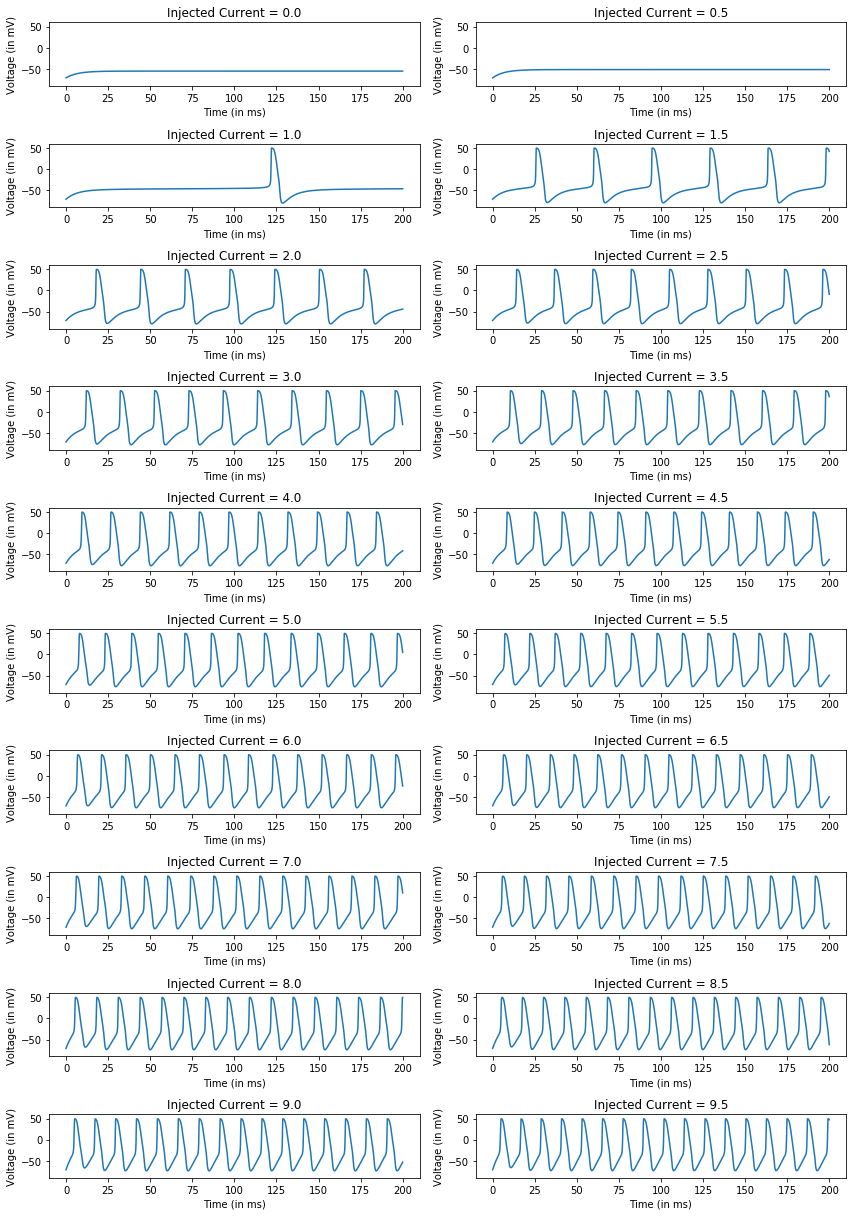

In [21]:
plt.figure(figsize=(12,17))
for i in range(20):
    plt.subplot(10,2,i+1)
    plt.plot(t,state[:,i])
    plt.title("Injected Current = {:0.1f}".format(i/2))
    plt.ylim([-90,60])
    plt.xlabel("Time (in ms)")
    plt.ylabel("Voltage (in mV)")

plt.tight_layout()
plt.show()

#### Quantifying the Firing Rates against Input Current

One way to quantify the firing rate is to perform a fourier analysis and find peak frequency, but an easier way to find the rate is to see how many times it crosses a threshold say 0 mV in a given time, here it is for 200ms = 0.2s, and find the rate.

Text(0, 0.5, 'Firing Rate (Hz)')

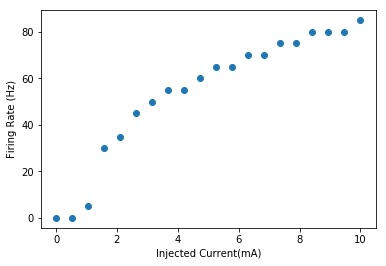

In [22]:
plt.plot(np.linspace(0,10,20),np.bitwise_and(state[:-1,:20]<0,state[1:,:20]>0).sum(axis=0)/0.2,"o")
plt.xlabel("Injected Current(mA)")
plt.ylabel("Firing Rate (Hz)")

## Day 4: NerveFlow: Neurons and Networks

Welcome to Day 4! Today, we learn about realistic modelling of synaptic interactions for networks of Hogkin Huxley Neurons and how to implement synapses in TensorFlow.

### How do we model Synapses?

A synapse is defined between two neurons. There can be multiple synapses between two neurons (even of the same type) but here we will consider only single synapses between two neuron. So, there can be atmost $n^2$ synapses of the same type between $n$ different neurons. Each synapse will have their own state variables the dynamics of which can be defined using differential equations. 

For most networks, not all neurons will be connected by all types of synapses. The network of neurons with have a certain connectivity that can be represented as a adjacency matrix in the language of graphs. Each type of synapse will have its own connectivity/adjacency matrix.

#### Types of Synapses

There are two major categories of synapses: Exitatory and Inhibitory Synapses.

Here we will focus on implementing one of each category of synapses, Excitatory and Inhibitory. 

#### Modelling Synapses

The current that passes through a synaptic channel depends on the difference between its reversal potential ($E_{syn}$) and the actual value of the membrane potential ($u$), and is $I_{syn}(t)=g_{syn}(t)(u(t)−E_{syn})$. We can describe the synaptic conductance $g_{syn}(t)=g_{max}[O](t)$, by its maximal conductance g_{max} and a gating variable $[O]$, where $[O](𝑡)$ is the fraction of open synaptic channels. Channels open when a neurotransmitter binds to the synapse which is a function of the presynaptic activation $[T]$.

$\frac{d[O]}{dt}=\alpha[T](1−[O])−\beta[O]$

where $\alpha$ is the binding constant, $\beta$ the unbinding constant and $(1−[O])$ the fraction of closed channels where binding of neurotransmitter can occur. The functional form of T depends on the type and nature of the synapse.
	

##### Acetylcholine Synapses (Excitatory)

$$[T]_{ach} = A\ \Theta(t_{max}+t_{fire}+t_{delay}-t)\ \Theta(t-t_{fire}-t_{delay})$$

##### GABAa Synapses (Inhibitory)

$$[T]_{gaba} = \frac{1}{1+e^{-\frac{V(t)-V_0}{\sigma}}}$$

#### Recalling and Redesigning the Generalized TensorFlow Integrator
Recall the RK4 based numerical integrator we had created on day 2. You might have noticed that there is an additional dynamical state variable required for the implementation of synapses which is cannot be trivially changed by a memoryless differential equation. Here, we use the word memoryless because till now, all our dynamical variables have only depended on the value immediately before. The dynamical state variable in question is the time of last firing, lets call it $fire_t$. 

One limitation of using TensorFlow in this implentation is that, when we are calculating the change in the dynamical state variable, we only have access to the values for variables immediately before unless we explicity save it as a different variable. Note that if we want to check if a neuron has "fired", we need to know the value of the voltage before and after the updation to check if it crossed the threshold. This means we have to change our implementation of the integrator to be able to update the varaible $fire_t$

We do this as follows:
1. The Integrator needs to know two more properties, the number of neurons ($n$) and firing threshold ($threshold$) for each of these neurons. We provide this information as inputs to the Integrator Class itself as arguments.
2. Our state vector will now have an additional $n$ many variables representing the firing time that will not undergo the standard differential updation but be updated by a single bit memory method. 
3. Inside our Integrator, we have access to the initial values of the state variable and the change in the state variable. We use this to check if the voltages have crossed the firing threshold. For this, we need to define a convection for the state vector, we will store the voltage of the neurons in the first $n$ elements and the fire times $fire_t$ in the last $n$ elements
4. The differential update function ie. step_func will take all variables but not update the last n values ie. $\frac{d\ fire_t}{dt}=0$, the updation will be performed by the scan function itself after the $\Delta y$ has been calculated. It will check for every neuron if the firing threshold of that neuron lies between $V$ and $V + \Delta V$ and update the variable fire_t of the appropriate neurons with the current time. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


def tf_check_type(t, y0): # Ensure Input is Correct
    if not (y0.dtype.is_floating and t.dtype.is_floating):
        raise TypeError('Error in Datatype')

def tf_check_increasing(t): # Ensure Time is Monotonically Increasing
    assert_op = tf.Assert(tf.reduce_all(t[1:]>t[:-1]),["Time must be monotonic"])
    return tf.control_dependencies([assert_op])

class _Tf_Integrator():
    
    def __init__(self,n_,F_b): 
        # class constructor to get inputs for number of neurons and firing thresholds
        self.n_ = n_
        self.F_b = F_b
    
    def integrate(self, func, y0, t): 
        time_delta_grid = t[1:] - t[:-1]
        scan_func = self._make_scan_func(func)
        y = tf.scan(scan_func, (t[:-1], time_delta_grid),y0)
        return tf.concat([[y0], y], axis=0)
    
    def _make_scan_func(self, func): # stepper function
        def scan_func(y, t_dt): 
            # recall the necessary variables
            n_ = self.n_
            F_b = self.F_b
            
            t, dt = t_dt
            
            # Differential updation
            dy = self._step_func(func,t,dt,y) # Make code more modular.
            dy = tf.cast(dy, dtype=y.dtype) # Failsafe
           
            out = y + dy # the result after differential updation
        
            # Conditional to use specialized Integrator vs Normal Integrator (n=0)
            if n_>0:
                
                # Extract the last n variables for fire times
                fire_t = y[-n_:] 
                
                # Value of change in firing times if neuron didnt fire = 0
                l = tf.zeros(tf.shape(fire_t),dtype=fire_t.dtype) 
                
                # Value of change in firing times if neuron fired = Current Time - Last Fire Time
                l_ = t-fire_t 
                
                # Check if Voltage is initially less than Firing Threshold
                z = tf.less(y[:n_],F_b)              
                # Check if Voltage is more than Firing Threshold after updation
                z_ = tf.greater_equal(out[:n_],F_b)  
                
                # tf.where(cond,a,b) chooses elements from a/b based on condition 
                df = tf.where(tf.logical_and(z,z_),l_,l) 
                
                fire_t_ = fire_t+df # Update firing time 
                
                return tf.concat([out[:-n_],fire_t_],0)
            else:
                return out
        return scan_func
    
    def _step_func(self, func, t, dt, y):
        k1 = func(y, t)
        half_step = t + dt / 2
        dt_cast = tf.cast(dt, y.dtype) # Failsafe

        k2 = func(y + dt_cast * k1 / 2, half_step)
        k3 = func(y + dt_cast * k2 / 2, half_step)
        k4 = func(y + dt_cast * k3, t + dt)
        return tf.add_n([k1, 2 * k2, 2 * k3, k4]) * (dt_cast / 6)
    

def odeint(func, y0, t, n_, F_b):
    t = tf.convert_to_tensor(t, preferred_dtype=tf.float64, name='t')
    y0 = tf.convert_to_tensor(y0, name='y0')
    tf_check_type(y0,t)
    with tf_check_increasing(t):
        return _Tf_Integrator(n_, F_b).integrate(func,y0,t)

#### Implementing the Dynamical Function for an Hodkin Huxley Neuron

Recall, each Hodgkin Huxley Neuron in a $n$ network has 4 main dynamical variables V, m, n, h which we represent as $n$ vectors. Now we need to add some more state variables for representing each synapse ie. the fraction of open channels. Now, the dynamics are given by:

For each neuron:

$$C_m\frac{dV}{dt} = I_{injected} - I_{Na} - I_K - I_L - I_{ach} - I_{gaba}$$

$$\frac{dm}{dt} = - \frac{1}{\tau_m}(m-m_0)$$

$$\frac{dh}{dt} = - \frac{1}{\tau_h}(h-h_0)$$

$$\frac{dn}{dt} = - \frac{1}{\tau_n}(n-n_0)$$

For each synapse:

$$\frac{d[O]_{ach}}{dt} = \alpha (1-[O]_{ach})[T]_{ach}-\beta[O]_{ach}$$

$$[T]_{ach} = A\ \Theta(t_{max}+t_{fire}+t_{delay}-t)\ \Theta(t-t_{fire}-t_{delay})$$

$$\frac{d[O]_{gaba}}{dt} = \alpha (1-[O]_{gaba})[T]_{gaba}-\beta[O]_{gaba}$$

$$[T]_{gaba} = \frac{1}{1+e^{-\frac{V(t)-V_0}{\sigma}}}$$

where the values of $\tau_m$, $\tau_h$, $\tau_n$, $m_0$, $h_0$, $n_0$ are given from the equations mentioned earlier.

#### Synaptic Memory Management

As discussed earlier, there are atmost $n^2$ synapses of each type but at a time, unless the network is fully connected/very dense, mostly we need a very small subset of these synapses. We could, in principle, calculate the dynamics of all $n^2$ but it would be pointless. So have to devise a matrix based sparse-dense coding system for evaluating the dynamics of these variables and also using their values. This will reduce memory usage and minimize number of calculations at the cost of time for encoding and decoding into dense data from sparse data. This is why we use a matrix approach, so that tensorflow can speed up the process. 

#### Defining the Connectivity

Lets take a very simple 3 neuron network to test how the two types of synapses work. Let $X_1$ be an Excitatory Neuron and it forms Acetylcholine Synapses, $X_2$ be a Inhibitory Neuron and it forms GABAa Synapses and $X_3$ be an output neuron that doesn't synapse onto any neurons. Take the network of the form: $X_1\rightarrow X_2\rightarrow X_3$. 

We create the connectivity matrices for both types of synapses. We need to define a convention for the ordering of connectivity. We set the presynaptic neurons as the column number, and the postsynaptic neurons as the row number.  

Let $X_1$,$X_2$,$X_3$ be indexed by 0, 1 and 2 respectively. The Acetylcholine connectivity matrix takes the form of:

$$Ach_{n\times n}=
\begin{bmatrix}
0&0&0\\
1&0&0\\
0&0&0\\
\end{bmatrix}
$$

Similarly, the GABAa connectivity matrix becomes:

$$GABA_{n\times n}=
\begin{bmatrix}
0&0&0\\
0&0&0\\
0&1&0\\
\end{bmatrix}
$$


In [24]:
n_n = 3 # number of simultaneous neurons to simulate

# Acetylcholine

ach_mat = np.zeros((n_n,n_n))        # Ach Synapse Connectivity Matrix
ach_mat[1,0]=1

## PARAMETERS FOR ACETYLCHLOLINE SYNAPSES ##

n_ach = int(np.sum(ach_mat))     # Number of Acetylcholine (Ach) Synapses 
alp_ach = [10.0]*n_ach           # Alpha for Ach Synapse
bet_ach = [0.2]*n_ach            # Beta for Ach Synapse
t_max = 0.3                          # Maximum Time for Synapse
t_delay = 0                          # Axonal Transmission Delay
A = [0.5]*n_n                        # Synaptic Response Strength
g_ach = [0.35]*n_n                   # Ach Conductance
E_ach = [0.0]*n_n                    # Ach Potential

# GABAa

gaba_mat = np.zeros((n_n,n_n))       # GABAa Synapse Connectivity Matrix
gaba_mat[2,1] = 1

## PARAMETERS FOR GABAa SYNAPSES ##

n_gaba = int(np.sum(gaba_mat)) # Number of GABAa Synapses
alp_gaba = [10.0]*n_gaba       # Alpha for GABAa Synapse
bet_gaba = [0.16]*n_gaba       # Beta for GABAa Synapse
V0 = [-20.0]*n_n                     # Decay Potential
sigma = [1.5]*n_n                    # Decay Time Constant
g_gaba = [0.8]*n_n                  # fGABA Conductance
E_gaba = [-70.0]*n_n                # fGABA Potential


#### Defining Firing Thresholds

We shall also define a list that stores the firing threshold for every neuron.

In [25]:
## Storing Firing Thresholds ##

F_b = [0.0]*n_n                      # Fire threshold

#### Defining Input Current as function of Time

We can store our input to each neuron as a $n\times timesteps$ matrix, say current_input, and extract the input at each time point during dynamical update step using a function which we shall call I_inj_t(t).

In [26]:
def I_inj_t(t):
    return tf.constant(current_input.T,dtype=tf.float64)[tf.to_int32(t/epsilon)] # Turn indices to integer and extract from matrix

#### Working with Sparse<->Dense Dynamics

For performing the dynamical updates for the synapses, we need only as many variables as the number of synapse x number of equations required for each synapse. Here our synapse models require only one dynamical variable ie. open fraction [O] which we will store as an k-vector where k is the number of synapses.

We will need to work with this [O] vector on two seperate instances and each time we will have to go to a sparse form to speed up computation.

##### A. Calculation of Synaptic Currents

The formula for $I_{syn}$ is given by $$I_{syn} = \sum_{presynaptic} g_{syn}[O](V-E_{syn})$$
The best way to represent this calculation is to use the connectivity matrix $\mathbf{C}$ for the synapses and the open fraction vector $\vec{[O]}$ to create an open fraction matrix $\mathbf{O}$ and perform the following computations.

$$\mathbf{C}=
\begin{bmatrix}
0&1&...&0\\
0&0&...&1\\
...&...&...&1\\
1&0&0&0
\end{bmatrix}\ \ \ \ \ \ \ \ \vec{[O]}=[O_1,O_2...O_k]\ \ \ \ \ \ \ \ 
\mathbf{O}=
\begin{bmatrix}
0&O_1&...&0\\
0&0&...&O_a\\
...&...&...&O_b\\
O_k&0&0&0
\end{bmatrix}
$$

$$\vec{[I_{syn}]}=\sum_{columns}\mathbf{O}\diamond(\vec{g}_{syn}\odot(\vec{V}-\vec{E}_{syn}))$$

where $\diamond$ is columnwise multiplication and $\odot$ is elementwise multiplication. $\vec{[I_{syn}]}$ is now the total synaptic current input to the each of the neurons.

##### Algorithm for Synaptic Currents

1. Firstly we need to convert from the dense $[O]$ vector to the sparse $\mathbf{O}$ matrix. TensorFlow does not allow to make changes to a defined tensor directly, thus we create a $n^{2}$ vector TensorFlow variable o_ which we will later reshape to a $n\times n$ matrix.
2. We then flatten the synaptic connectivity matrix and find the indices where there is a connection. For this we use the boolean mask function to choose the correct k (total number of synapses) indices from the range $1$ to $n^2$ and store in the variable ind.
3. Using the scatter_update function of TensorFlow, we fill the correct indices of the variable o_ that we created with the values of open fraction from the $[O]$ vector.
4. We now reshape the vector as a $n\times n$ matrix. Since python stores matrices as array of arrays, with each row as an inner array, for performing columnswise multiplication, the easiest way is to tranpose the matrix, so that each column is the inner array, perform element wise multiplication with each inner array and apply transpose again.
5. Finally using reduce_sum, we sum over the columns to get our $I_{syn}$ vector.

In [27]:
## Acetylcholine Synaptic Current ##

def I_ach(o,V):
    o_ = tf.Variable([0.0]*n_n**2,dtype=tf.float64)
    ind = tf.boolean_mask(tf.range(n_n**2),ach_mat.reshape(-1) == 1)
    o_ = tf.scatter_update(o_,ind,o)
    o_ = tf.transpose(tf.reshape(o_,(n_n,n_n)))
    return tf.reduce_sum(tf.transpose((o_*(V-E_ach))*g_ach),1)

## GABAa Synaptic Current ##

def I_gaba(o,V):
    o_ = tf.Variable([0.0]*n_n**2,dtype=tf.float64)
    ind = tf.boolean_mask(tf.range(n_n**2),gaba_mat.reshape(-1) == 1)
    o_ = tf.scatter_update(o_,ind,o)
    o_ = tf.transpose(tf.reshape(o_,(n_n,n_n)))
    return tf.reduce_sum(tf.transpose((o_*(V-E_gaba))*g_gaba),1)

## Other Currents ##

def I_K(V, n):
    return g_K  * n**4 * (V - E_K)

def I_Na(V, m, h):
    return g_Na * m**3 * h * (V - E_Na)

def I_L(V):
    return g_L * (V - E_L)

##### B. Updation of Synaptic Variables

For the updation, the first we need to calculate the values of the presynaptic activation [T] for both types of synapses. We will essentially calculate this for each neuron and then redirect the values to the correct post synaptic neuron. Recall:

$$[T]_{ach} = A\ \Theta(t_{max}+t_{fire}+t_{delay}-t)\ \Theta(t-t_{fire}-t_{delay})$$

$$[T]_{gaba} = \frac{1}{1+e^{-\frac{V(t)-V_0}{\sigma}}}$$

Thus $[T]_{ach}$ is function of the last firing time, and $[T]_{gaba}$ depends on the presynaptic voltage. Once we calculate the values of [T]-vector for both types of synapse, we need to redirect them to the correct synapses in a dense $k\times1$ vector form. 

##### Algorithm for Dynamics

1. For $[T]_{ach}$, use a boolean logical_and function to check is the current timepoint t is greater than the last fire time (fire_t) + delay (t_delay) and less than last fire time (fire_t) + delay (t_delay) + activation length (t_max) for each neuron as a vector. Use the result of these boolean operations to choose between zero or an constant A. This serves as the heaviside step function. For $[T]_{gaba}$, simply use the V vector to determine T.
2. For making the dense vector, we follow as two step process. First we multiply each row of the connectivity matrices $\mathbf{C}$ with the respective $[T]$ vector to get a activation matrix $\mathbf{T}$, and then we just flatten $\mathbf{T}$ and $\mathbf{C}$ and, using boolean_mask, remove all the zeros from $\mathbf{T}$ to get a $k\times1$ vector which now stores the presynaptic activation for each of the synapses where $k=n_{gaba}$ or $n_{ach}$
3. Calculate the differential change in the open fractions using the $k\times1$ vector.


In [28]:
def dAdt(X, t):
    V = X[:1*n_n]       # First n_n values are Membrane Voltage
    m = X[1*n_n:2*n_n]  # Next n_n values are Sodium Activation Gating Variables
    h = X[2*n_n:3*n_n]  # Next n_n values are Sodium Inactivation Gating Variables
    n = X[3*n_n:4*n_n]  # Next n_n values are Potassium Gating Variables
    o_ach = X[4*n_n : 4*n_n + n_ach] # Next n_ach values are Acetylcholine Synapse Open Fractions
    o_gaba = X[4*n_n + n_ach : 4*n_n + n_ach + n_gaba] # Next n_ach values are GABAa Synapse Open Fractions
    fire_t = X[-n_n:]   # Last n_n values are the last fire times as updated by the modified integrator
    
    dVdt = (I_inj_t(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V) - I_ach(o_ach,V) - I_gaba(o_gaba,V)) / C_m 
    
    ## Updation for gating variables ##
    
    m0,tm,h0,th = Na_prop(V)
    n0,tn = K_prop(V)

    dmdt = - (1.0/tm)*(m-m0)
    dhdt = - (1.0/th)*(h-h0)
    dndt = - (1.0/tn)*(n-n0)
    
    ## Updation for o_ach ##
    
    A_ = tf.constant(A,dtype=tf.float64)
    Z_ = tf.zeros(tf.shape(A_),dtype=tf.float64)
    
    T_ach = tf.where(tf.logical_and(tf.greater(t,fire_t+t_delay),tf.less(t,fire_t+t_max+t_delay)),A_,Z_) 
    T_ach = tf.multiply(tf.constant(ach_mat,dtype=tf.float64),T_ach)
    T_ach = tf.boolean_mask(tf.reshape(T_ach,(-1,)),ach_mat.reshape(-1) == 1)
    
    do_achdt = alp_ach*(1.0-o_ach)*T_ach - bet_ach*o_ach
    
    ## Updation for o_gaba ##
        
    T_gaba = 1.0/(1.0+tf.exp(-(V-V0)/sigma))
    T_gaba = tf.multiply(tf.constant(gaba_mat,dtype=tf.float64),T_gaba)
    T_gaba = tf.boolean_mask(tf.reshape(T_gaba,(-1,)),gaba_mat.reshape(-1) == 1)
    
    do_gabadt = alp_gaba*(1.0-o_gaba)*T_gaba - bet_gaba*o_gaba
    
    ## Updation for fire times ##
    
    dfdt = tf.zeros(tf.shape(fire_t),dtype=fire_t.dtype) # zero change in fire_t
    

    out = tf.concat([dVdt,dmdt,dhdt,dndt,do_achdt,do_gabadt,dfdt],0)
    return out

#### Defining the Gating Variable Updation Function and the Initial Conditions

Like earlier, we again define the function that returns us the values of $\tau_m$, $\tau_h$, $\tau_n$, $m_0$, $h_0$, $n_0$ and we prepare the parameters and initial conditions. 

Note: If we initialize the last firing time as 0, then the second neuron $X_2$ will get an EPSP immediately after the start of the simulation. To avoid this the last firing time should be initialized to a large negative number >= the length of the simulation.

In [29]:
def K_prop(V):
    T = 22
    phi = 3.0**((T-36.0)/10)
    V_ = V-(-50)
    
    alpha_n = 0.02*(15.0 - V_)/(tf.exp((15.0 - V_)/5.0) - 1.0)
    beta_n = 0.5*tf.exp((10.0 - V_)/40.0)
    
    t_n = 1.0/((alpha_n+beta_n)*phi)
    n_inf = alpha_n/(alpha_n+beta_n)
    
    return n_inf, t_n


def Na_prop(V):
    T = 22
    phi = 3.0**((T-36)/10)
    V_ = V-(-50)
    
    alpha_m = 0.32*(13.0 - V_)/(tf.exp((13.0 - V_)/4.0) - 1.0)
    beta_m = 0.28*(V_ - 40.0)/(tf.exp((V_ - 40.0)/5.0) - 1.0)
    
    alpha_h = 0.128*tf.exp((17.0 - V_)/18.0)
    beta_h = 4.0/(tf.exp((40.0 - V_)/5.0) + 1.0)
    
    t_m = 1.0/((alpha_m+beta_m)*phi)
    t_h = 1.0/((alpha_h+beta_h)*phi)
    
    m_inf = alpha_m/(alpha_m+beta_m)
    h_inf = alpha_h/(alpha_h+beta_h)
    
    return m_inf, t_m, h_inf, t_h


# Initializing the Parameters

C_m = [1.0]*n_n
g_K = [10.0]*n_n
E_K = [-95.0]*n_n

g_Na = [100]*n_n
E_Na = [50]*n_n 

g_L = [0.15]*n_n
E_L = [-55.0]*n_n

# Initializing the State Vector

y0 = tf.constant([-71]*n_n+[0,0,0]*n_n+[0]*n_ach+[0]*n_gaba+[-9999999]*n_n,dtype=tf.float64)

#### Creating the Current Input and Run the Simulation

We will run an 700 ms simulation with 100ms current injection at neuron $X_1$ of increasing amplitude with 100ms gaps in between.

In [30]:
epsilon = 0.01
t = np.arange(0,700,epsilon)

current_input= np.zeros((n_n,t.shape[0]))
current_input[0,int(100/epsilon):int(200/epsilon)] = 2.5
current_input[0,int(300/epsilon):int(400/epsilon)] = 5.0
current_input[0,int(500/epsilon):int(600/epsilon)] = 7.5

state = odeint(dAdt,y0,t,n_n,F_b)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    state = sess.run(state)

#### Visualizing and Interpreting the Output

We overlay the voltage traces for the three neurons and observe the dynamics.

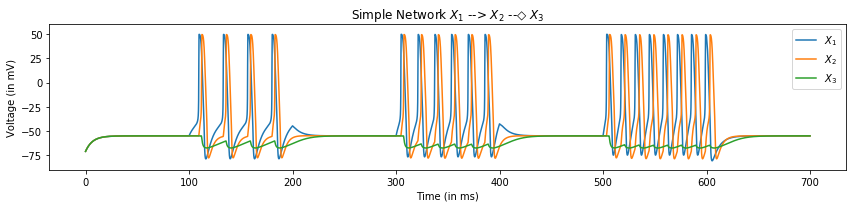

In [31]:
plt.figure(figsize=(12,3))
    
plt.plot(t,state[:,0],label="$X_1$")
plt.plot(t,state[:,1],label="$X_2$")
plt.plot(t,state[:,2],label="$X_3$")
plt.title("Simple Network $X_1$ --> $X_2$ --◇ $X_3$")
plt.ylim([-90,60])
plt.xlabel("Time (in ms)")
plt.ylabel("Voltage (in mV)")
plt.legend()

plt.tight_layout()
plt.show()

We can see that the current injection triggers the firing of action potentials with increasing frequency with increasing current. Also we see that as soon as the first neuron $X_1$ crosses its fireing threshold, an EPSP is triggered in the next neuron $X_2$ causing a firing with a slight delay from the firing of $X_1$. Finally, as the second neuron depolarizes, we see a corresponding hyperpolarization in the next neuron $X_3$ caused by an IPSP. We can also plot the dynamics of the channels itself by plotting o_ach and o_gaba which are the 5th and 4th last elements respectively.

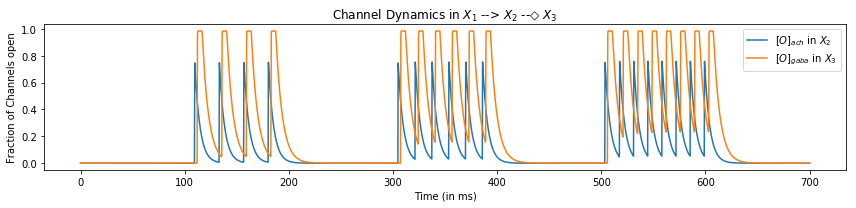

In [32]:
plt.figure(figsize=(12,3))
    
plt.plot(t,state[:,-5],label="$[O]_{ach}$ in $X_2$")
plt.plot(t,state[:,-4],label="$[O]_{gaba}$ in $X_3$")
plt.title("Channel Dynamics in $X_1$ --> $X_2$ --◇ $X_3$")
#plt.ylim([-90,60])
plt.xlabel("Time (in ms)")
plt.ylabel("Fraction of Channels open")
plt.legend()

plt.tight_layout()
plt.show()

Thus we are now capable of making complex networks of neurons with both excitatory and inhibitory connections.

## Day 5: Into the Mind of a Locust

Welcome to Day 5! Now that we have figured out how to implement neurons and networks, today we try to simulate a model of a small part of a Locust's nervous system.

### A Locust Antennal Lobe

To an insect, the sense of smell is its source of essential information about their surroundings. Whether it is getting attracted to a potential mate or finding a source of nutrition, odorants are known to trigger various behaviors in insects. Because of their simpler nervous systems and amazing ability to detect and track odors, insects are used to study olfaction to a great extent. Their most surprising ability is to track odors even in the very noisy natural environments. To study this neurobiology look a the dynamics of the networks involved in the processing of chemosensory information to the insect.

Odorants are detected by receptors in olfactory receptor neurons (ORNs) which undergo a depolarization as a result. The antennal lobe (AL) in the insects' brain is considered to be the primary structure that receives input from ORNs within the antennae. It is the consensus that, since different sets of ORNs are activated by different odors, the coding of the odor identity is combinatorial in nature. Inside the Antennal Lobe, the input from the the ORNs is converted into complex long-lived dynamic transients and complex interacting signals which output to the mushroom body in the insect brain. Moreover, the network in the Locust Antennal Lobe seems to be a random network rather than a genetically encoded network with a particular fixed topology.

The Locust AL has two types of neurons:
1. **Inhibitory Local Interneurons (LN):** They produce GABAergic Synapses ie. GABAa (Fast) and Metabotropic GABA (Slow). They synapse onto other Local Interneurons and to Projection Neurons. A subset of them receive inputs from the ORNs.
2. **Projection Neurons (PN):** They produce Cholinergic Synapses ie. Acetylcholine. They synapse onto local interneurons and also project to the mushroom body outside the AL and act as the output for the AL. A subset of them also receive inputs from the ORNs.


#### A Model of the Locust AL

The model described here is based on Bazhenov 2001b.

<img src="model.png" alt="model.png" width="400"/>

**Total Number of Neurons** = 120  
**Number of PNs** = 90    
**Number of LNs** = 30  

The connectivity is random with different connection probabilities as described below:  

**Probability(PN to PN)** = 0.0  
**Probability(PN to LN)** = 0.5  
**Probability(LN to LN)** = 0.5  
**Probability(LN to PN)** = 0.5  

33% of all neurons receive input from ORNs.

##### Projection Neurons

The projection neurons have an hodgkin huxley dynamics as described below:

$$C_m \frac{dV_{PN}}{dt} = I_{stim} - I_{L} - I_{Na} - I_{K} - I_{A} - I_{KL} - I_{GABA_a} -I_{Ach}$$

It expresses voltage-gated Na$^+$ channels, voltage-gated K$^+$ channels, transient K$^+$ channels, K$^+$ leak channels and general leak channel. The Acetylcholine current is always zero in this model as PNs do not project to PNs.

The PN currents and differential equation for dynamics are described below:

<img src="PNeq.png" alt="PNeq.png"/>

##### Local Interneurons

The Local Interneurons have an dynamics somewhat similar to hodgkin huxley as described below:  

$$C_m \frac{dV_{LN}}{dt} = I_{stim} - I_{L} - I_{Ca} - I_{K} - I_{K(Ca)} - I_{KL} - I_{GABA_a} -I_{Ach}$$

Unlike the Projection neuron, the local interneurons do not have the normal sodium potassium channel action potentials. They expresse voltage-gated Ca$^{2+}$ channels, voltage-gated K$^+$ channels, Calcium dependent K$^+$ channels, K$^+$ leak channels and general leak channel. Here, opposite interactions between K and Ca channels cause longer extended action potentials. The dynamics in intracellular Ca$^{2+}$ causes changes in K(Ca) channel dynamics allowing for adaptive behavior in the neurons.

The LN currents and differential equation for dynamics are described below:
<img src="LNeq.png" alt="LNeq.png"/>

##### Synaptic Dynamics

Finally, the equation of the dynamics of the two types of synapses are given below.

<img src="syneq.png" alt="syneq.png"/>

### Implementing the Model using NerveFlow

Now that we have defined the model, we can start implementing it in TensorFlow. To improve out readability and make our code more modular we seperate the integrator into a independent import module. Take the integrator code that we developed in the last day and place it in a file called "nerveflow.py". Make sure the file is present in the same directory as the implementation of the model. 

Note: If you are using Jupyter Notebook, remember to remove the %matplotlib inline command as it is specific to jupyter.

#### Importing Nerveflow

Once the Integrator is saved in nerveflow.py, we can start importing the essentials including the integrator. 

In [33]:
import tensorflow as tf
import numpy as np
import nerveflow as nv
import matplotlib.pyplot as plt
import seaborn as sns

#### Defining Simulation Parameters

Now we can start defining the parameters of the model. First, we define the length of the simulation and the time resolution and create the time array t.

In [34]:
sim_time = 1000 # simulation time (in ms)
sim_res = 0.01 # simulation resolution (in ms)

t = np.arange(0.0, sim_time, sim_res) # time array

Now we start implementing the details of the network. Since there are two different cell types they may have different properties/parameters. As you might remember, our parallelization paradigm allows us to have different values of parameters for different neurons/synapses by having parameter vectors. To make it easy for us to manipulate the information it is best for us to have a convection for splitting parameters into cell types.

Here, we follow the convention that the first 90 values of each common parameter will be for PN cell type and the rest 30 will be for LN cell type. Unique parameters are defined whenever necessary.

In [35]:
# Defining Neuron Counts

n_n = int(120)                 # number of neurons

p_n = int(90)                  # number of PNs
l_n = int(30)                  # number of LNs

C_m  = [1.0]*n_n                     # Capacitance

# Defining Common Current Parameters #

g_K  = [10.0]*n_n                    # K conductance
g_L  = [0.15]*n_n                    # Leak conductance
g_KL  = [0.05]*p_n + [0.02]*l_n      # K leak conductance (first 90 for PNs and next 30 for LNs)

E_K  = [-95.0]*n_n                   # K Potential
E_L  = [-55.0]*p_n + [-50.0]*l_n     # Leak Potential (first 90 for PNs and next 30 for LNs)
E_KL  = [-95.0]*n_n                  # K Leak Potential

# Defining Cell Type Specific Current Parameters #

## PNs

g_Na = [100.0]*p_n                   # Na conductance
g_A  = [10.0]*p_n                    # Transient K conductance

E_Na = [50.0]*p_n                    # Na Potential
E_A  = [-95.0]*p_n                   # Transient K Potential

## LNs

g_Ca = [3.0]*l_n                     # Ca conductance
g_KCa = [0.3]*l_n                    # Ca dependent K conductance

E_Ca = [140.0]*l_n                   # Ca Potential
E_KCa = [-90]*l_n                    # Ca dependent K Potential

A_Ca = 2*(10**(-4))                  # Ca outflow rate
Ca0 = 2.4*(10**(-4))                 # Equilibrium Calcium Concentration
t_Ca = 150                           # Ca recovery time constant

## Defining Firing Thresholds ##

F_b = [0.0]*n_n                      # Fire threshold

## Defining Acetylcholine Synapse Connectivity ##

ach_mat = np.zeros((n_n,n_n))                                 # Ach Synapse Connectivity Matrix
ach_mat[p_n:,:p_n] = np.random.choice([0.,1.],size=(l_n,p_n)) # 50% probability of PN -> LN
np.fill_diagonal(ach_mat,0.)                                  # Remove all self connection

## Defining Acetylcholine Synapse Parameters ##

n_syn_ach = int(np.sum(ach_mat))     # Number of Acetylcholine (Ach) Synapses 
alp_ach = [10.0]*n_syn_ach           # Alpha for Ach Synapse
bet_ach = [0.2]*n_syn_ach            # Beta for Ach Synapse
t_max = 0.3                          # Maximum Time for Synapse
t_delay = 0                          # Axonal Transmission Delay
A = [0.5]*n_n                        # Synaptic Response Strength
g_ach = [0.35]*p_n+[0.3]*l_n         # Ach Conductance
E_ach = [0.0]*n_n                    # Ach Potential

## Defining GABAa Synapse Connectivity ##

fgaba_mat = np.zeros((n_n,n_n))                              # GABAa Synapse Connectivity Matrix
fgaba_mat[:,p_n:] = np.random.choice([0.,1.],size=(n_n,l_n)) # 50% probability of LN -> LN/PN
np.fill_diagonal(fgaba_mat,0.)                               # No self connection

## Defining GABAa Synapse Parameters ##
    
n_syn_fgaba = int(np.sum(fgaba_mat)) # Number of GABAa (fGABA) Synapses
alp_fgaba = [10.0]*n_syn_fgaba       # Alpha for fGABA Synapse
bet_fgaba = [0.16]*n_syn_fgaba       # Beta for fGABA Synapse
V0 = [-20.0]*n_n                     # Decay Potential
sigma = [1.5]*n_n                    # Decay Time Constant
g_fgaba = [0.8]*p_n+[0.8]*l_n        # fGABA Conductance
E_fgaba = [-70.0]*n_n                # fGABA Potential

#### Visualizing the Connectivity

Now that we have a connectivity matrix, we can visualize the connectivity as a heatmap. For this, we combine the two synapse connectivity matrix to get a single matrix that has +1 for excitatory connection and -1 for inhibitory connections. Then we use seaborn library to get a clean heatmap.

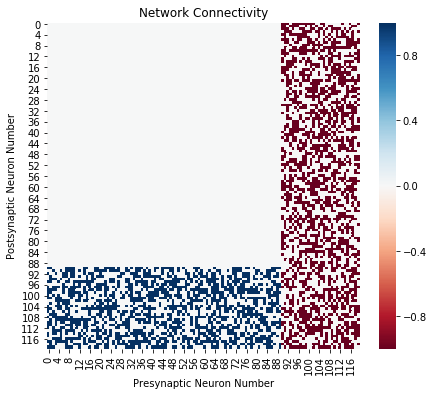

In [36]:
plt.figure(figsize=(7,6))
sns.heatmap(ach_mat-fgaba_mat, cmap="RdBu")
plt.xlabel("Presynaptic Neuron Number")
plt.ylabel("Postsynaptic Neuron Number")
plt.title("Network Connectivity")
plt.show()

#### Defining the functions to evaluate dynamics in gating variables

Now, we define all the functions that will evaluate the equilibium value and time constants of gating variable for different channels.

In [37]:
def K_prop(V):
    
    T = 22
    
    phi = 3.0**((T-36.0)/10)
    
    V_ = V-(-50)
    
    alpha_n = 0.02*(15.0 - V_)/(tf.exp((15.0 - V_)/5.0) - 1.0)
    beta_n = 0.5*tf.exp((10.0 - V_)/40.0)
    
    t_n = 1.0/((alpha_n+beta_n)*phi)
    n_inf = alpha_n/(alpha_n+beta_n)
    
    return n_inf, t_n


def Na_prop(V):
    T = 22
    
    phi = 3.0**((T-36)/10)
    
    V_ = V-(-50)
    
    alpha_m = 0.32*(13.0 - V_)/(tf.exp((13.0 - V_)/4.0) - 1.0)
    beta_m = 0.28*(V_ - 40.0)/(tf.exp((V_ - 40.0)/5.0) - 1.0)
    
    alpha_h = 0.128*tf.exp((17.0 - V_)/18.0)
    beta_h = 4.0/(tf.exp((40.0 - V_)/5.0) + 1.0)
    
    t_m = 1.0/((alpha_m+beta_m)*phi)
    t_h = 1.0/((alpha_h+beta_h)*phi)
    
    m_inf = alpha_m/(alpha_m+beta_m)
    h_inf = alpha_h/(alpha_h+beta_h)
    
    return m_inf, t_m, h_inf, t_h


def A_prop(V):
    T = 36
    
    phi = 3.0**((T-23.5)/10)
    
    m_inf = 1/(1+tf.exp(-(V+60.0)/8.5))
    h_inf = 1/(1+tf.exp((V+78.0)/6.0))
    
    tau_m = 1/(tf.exp((V+35.82)/19.69) + tf.exp(-(V+79.69)/12.7) + 0.37) / phi
    
    t1 = 1/(tf.exp((V+46.05)/5.0) + tf.exp(-(V+238.4)/37.45)) / phi
    t2 = (19.0/phi) * tf.ones(tf.shape(V),dtype=V.dtype)
    tau_h = tf.where(tf.less(V,-63.0),t1,t2)
    
    return m_inf, tau_m, h_inf, tau_h


def Ca_prop(V):
    
    m_inf = 1/(1+tf.exp(-(V+20.0)/6.5))
    h_inf = 1/(1+tf.exp((V+25.0)/12))
    
    tau_m = 1.5
    tau_h = 0.3*tf.exp((V-40.0)/13.0) + 0.002*tf.exp((60.0-V)/29)
    
    return m_inf, tau_m, h_inf, tau_h

def KCa_prop(Ca):
    T = 26
    
    phi = 2.3**((T-23.0)/10)
    
    alpha = 0.01*Ca
    beta = 0.02
    
    tau = 1/((alpha+beta)*phi)
    
    return alpha*tau*phi, tau

#### Defining Channel Currents, Synaptic Potentials, and Input Currents (Injection Current)

Just like the normal hodgkin-huxley network, we define the different functions that evaluate the different neuronal currents.


In [38]:
# NEURONAL CURRENTS

# Common Currents #

def I_K(V, n):
    return g_K  * n**4 * (V - E_K)

def I_L(V):
    return g_L * (V - E_L)

def I_KL(V):
    return g_KL * (V - E_KL)

# PN Currents #

def I_Na(V, m, h):
    return g_Na * m**3 * h * (V - E_Na)

def I_A(V, m, h):
    return g_A * m**4 * h * (V - E_A)

# LN Currents #

def I_Ca(V, m, h):
    return g_Ca * m**2 * h * (V - E_Ca)

def I_KCa(V, m):
    T = 26
    phi = 2.3**((T-23.0)/10)
    return g_KCa * m * phi * (V - E_KCa)

# SYNAPTIC CURRENTS

def I_ach(o,V):
    o_ = tf.Variable([0.0]*n_n**2,dtype=tf.float64)
    ind = tf.boolean_mask(tf.range(n_n**2),ach_mat.reshape(-1) == 1)
    o_ = tf.scatter_update(o_,ind,o)
    o_ = tf.transpose(tf.reshape(o_,(n_n,n_n)))
    return tf.reduce_sum(tf.transpose((o_*(V-E_ach))*g_ach),1)

def I_fgaba(o,V):
    o_ = tf.Variable([0.0]*n_n**2,dtype=tf.float64)
    ind = tf.boolean_mask(tf.range(n_n**2),fgaba_mat.reshape(-1) == 1)
    o_ = tf.scatter_update(o_,ind,o)
    o_ = tf.transpose(tf.reshape(o_,(n_n,n_n)))
    return tf.reduce_sum(tf.transpose((o_*(V-E_fgaba))*g_fgaba),1)

# INPUT CURRENTS

def I_inj_t(t):
    return tf.constant(current_input.T,dtype=tf.float64)[tf.to_int32(t*100)]

#### Putting Together the Dynamics

The construction of the function that evaluates the dynamical equations is similar to the normal HH Model but we have a small difference. That is, not all neurons share the same dynamical equations, they have some common terms and some terms that are unique. The procedure we deal with this is briefly explained below.

$$\frac{d\vec{X_A}}{dt} = f(\vec{X_{A_\alpha}},\vec{X_{A_\beta}}...)+g_A(\vec{X_{A_\gamma}}...)\ \ \ \ \ \ \frac{d\vec{X_B}}{dt} = f(\vec{X_{B_\alpha}},\vec{X_{B_\beta}}...)+g_B(\vec{X_{B_\gamma}}...)$$
$$To\ evaluate\ \frac{d\vec{X}}{dt}\ where\ \vec{X}=[\vec{X_A},\vec{X_B}], Find:$$

$$\Big(\frac{dX_A}{dt}\Big)_{unique}=g_A(\vec{X_{A_\gamma}}..)\ \ \ \ \ \ \ \ \ \ \ \ \ \Big(\frac{dX_B}{dt}\Big)_{unique}=g_B(\vec{X_{B_\gamma}}..)$$
  
$$\Big(\frac{dX}{dt}\Big)_{unique}=\Big[\Big(\frac{dX_A}{dt}\Big)_{unique},\Big(\frac{dX_B}{dt}\Big)_{unique}\Big]$$


$$\frac{dX}{dt}=\Big(\frac{dX}{dt}\Big)_{unique}+f(\vec{X_{\alpha}},\vec{X_{\beta}}...)$$

This way, we can minimize the number of computations required for the simulation and all the computations are highly parallelizeable by TensorFlow. As for the vector we follow the convention given below:

* Voltage(PN)[90]
* Voltage(LN)[30]
* K-gating(ALL)[120]
* Na-activation-gating(PN)[90]
* Na-inactivation-gating(PN)[90]
* Transient-K-activation-gating(PN)[90]
* Transient-K-inactivation-gating(PN)[90]
* Ca-activation-gating(LN)[30]
* Ca-inactivation-gating(LN)[30]
* K(Ca)-gating(LN)[30]
* Ca-concentration(LN)[30]
* Acetylcholine Open Fraction[n_syn_ach]
* GABAa Open Fraction[n_syn_fgaba]
* Fire-times[120]

In [39]:
def dAdt(X, t): # X is the state vector
    
    V_p   = X[0   : p_n] # Voltage(PN)
    V_l   = X[p_n : n_n] # Voltage(LN)
    
    n_K   = X[n_n : 2*n_n] # K-gating(ALL)
    
    m_Na  = X[2*n_n : 2*n_n + p_n] # Na-activation-gating(PN)
    h_Na  = X[2*n_n + p_n : 2*n_n + 2*p_n] # Na-inactivation-gating(PN)

    m_A   = X[2*n_n + 2*p_n : 2*n_n + 3*p_n] # Transient-K-activation-gating(PN)
    h_A   = X[2*n_n + 3*p_n : 2*n_n + 4*p_n] # Transient-K-inactivation-gating(PN)
    
    m_Ca  = X[2*n_n + 4*p_n : 2*n_n + 4*p_n + l_n] # Ca-activation-gating(LN)
    h_Ca  = X[2*n_n + 4*p_n + l_n: 2*n_n + 4*p_n + 2*l_n] # Ca-inactivation-gating(LN)
    
    m_KCa = X[2*n_n + 4*p_n + 2*l_n : 2*n_n + 4*p_n + 3*l_n] # K(Ca)-gating(LN)
    Ca    = X[2*n_n + 4*p_n + 3*l_n: 2*n_n + 4*p_n + 4*l_n] # Ca-concentration(LN)

    o_ach = X[6*n_n : 6*n_n + n_syn_ach] # Acetylcholine Open Fraction
    o_fgaba = X[6*n_n + n_syn_ach : 6*n_n + n_syn_ach + n_syn_fgaba] # GABAa Open Fraction
    
    fire_t = X[-n_n:] # Fire-times
    
    V = X[:n_n] # Overall Voltage (PN + LN)
    
    
    # Evaluate Differentials for Gating variables and Ca concentration
    
    n0,tn = K_prop(V)
    
    dn_k = - (1.0/tn)*(n_K-n0)
    
    m0,tm,h0,th = Na_prop(V_p)
    
    dm_Na = - (1.0/tm)*(m_Na-m0)
    dh_Na = - (1.0/th)*(h_Na-h0)
    
    m0,tm,h0,th = A_prop(V_p)
    
    dm_A = - (1.0/tm)*(m_A-m0)
    dh_A = - (1.0/th)*(h_A-h0)
    
    m0,tm,h0,th = Ca_prop(V_l)
    
    dm_Ca = - (1.0/tm)*(m_Ca-m0)
    dh_Ca = - (1.0/th)*(h_Ca-h0)
    
    m0,tm = KCa_prop(Ca)
    
    dm_KCa = - (1.0/tm)*(m_KCa-m0)
    
    dCa = - A_Ca*I_Ca(V_l,m_Ca,h_Ca) - (Ca - Ca0)/t_Ca
    
    # Evaluate differential for Voltage
    
    # The dynamical equation for voltage has both unique and common parts.
    # Thus, as discussed above, we first evaluate the unique parts of Cm*dV/dT for LNs and PNs.
    
    CmdV_p = - I_Na(V_p, m_Na, h_Na) - I_A(V_p, m_A, h_A)
    CmdV_l = - I_Ca(V_l, m_Ca, h_Ca) - I_KCa(V_l, m_KCa)
    
    # Once we have that, we merge the two into a single 120-vector.
    
    CmdV = tf.concat([CmdV_p,CmdV_l],0)
    
    # Finally we add the common currents and divide by Cm to get dV/dt.
    
    dV = (I_inj_t(t) + CmdV - I_K(V, n_K) - I_L(V) - I_KL(V) - I_ach(o_ach,V) - I_fgaba(o_fgaba,V)) / C_m
    
    # Evaluate dynamics in synapses
    
    A_ = tf.constant(A,dtype=tf.float64)
    T_ach = tf.where(tf.logical_and(tf.greater(t,fire_t+t_delay),tf.less(t,fire_t+t_max+t_delay)),A_,tf.zeros(tf.shape(A_),dtype=A_.dtype))
    T_ach = tf.multiply(tf.constant(ach_mat,dtype=tf.float64),T_ach)
    T_ach = tf.boolean_mask(tf.reshape(T_ach,(-1,)),ach_mat.reshape(-1) == 1)
    do_achdt = alp_ach*(1.0-o_ach)*T_ach - bet_ach*o_ach
    
    T_fgaba = 1.0/(1.0+tf.exp(-(V-V0)/sigma))
    T_fgaba = tf.multiply(tf.constant(fgaba_mat,dtype=tf.float64),T_fgaba)
    T_fgaba = tf.boolean_mask(tf.reshape(T_fgaba,(-1,)),fgaba_mat.reshape(-1) == 1)
    do_fgabadt = alp_fgaba*(1.0-o_fgaba)*T_fgaba - bet_fgaba*o_fgaba
    
    # Set change in fire-times as zero
    
    dfdt = tf.zeros(tf.shape(fire_t),dtype=fire_t.dtype)

    # Combine to a single vector
    
    out = tf.concat([dV,         dn_k,
                     dm_Na,      dh_Na,
                     dm_A,       dh_A,
                     dm_Ca,      dh_Ca,
                     dm_KCa,     
                     dCa,        do_achdt,
                     do_fgabadt, dfdt   ],0)
    return out

#### Creating the Current Input and Run the Simulation

We will run an 1000 ms simulation where we will give input to randomly chosen 33% of the neurons. The input will be an saturating increase to 10 from 100 ms to 600 ms and an exponetial decrease to 0 after 600 ms. 

In [40]:
current_input = np.zeros((n_n,t.shape[0]))

# Create the input shape

y = np.where(t<600,(1-np.exp(-(t-100)/75)),0.9996*np.exp(-(t-600)/150))
y = np.where(t<100,np.zeros(t.shape),y)

# Randomly choose 33% indices from 120

p_input = 0.33
input_neurons = np.random.choice(np.array(range(n_n)),int(p_input*n_n),replace=False)

# Assign input shape to chosen indices

current_input[input_neurons,:]= 10*y

#### Create the initial state vector and add some jitter to break symmetry

We create the initial state vector, initializing voltage to $-70\ mV$, gating variables and open fractions to $0.0$, and calcium concentration to $2.4\times10^{-4}$ and add 1% gaussian noise to the data.

In [41]:
state_vector =  [-70]* n_n + [0.0]* (n_n + 4*p_n + 3*l_n) + [2.4*(10**(-4))]*l_n + [0]*(n_syn_ach+n_syn_fgaba) + [-(sim_time+1)]*n_n
state_vector = np.array(state_vector)
state_vector = state_vector + 0.01*state_vector*np.random.normal(size=state_vector.shape)
init_state = tf.constant(state_vector, dtype=tf.float64)

#### Running the simulation and Interpreting the Output

In [42]:
state = nv.odeint(dAdt, init_state, t, n_n, F_b)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    state = sess.run(state)
    sess.close()

To visualize the data, we plot the voltage traces of the PNs (Neurons 0 to 89) and LNs (Neurons 90 to 119) as a Voltage vs Time heatmap, peaks in the data are the action potentials.

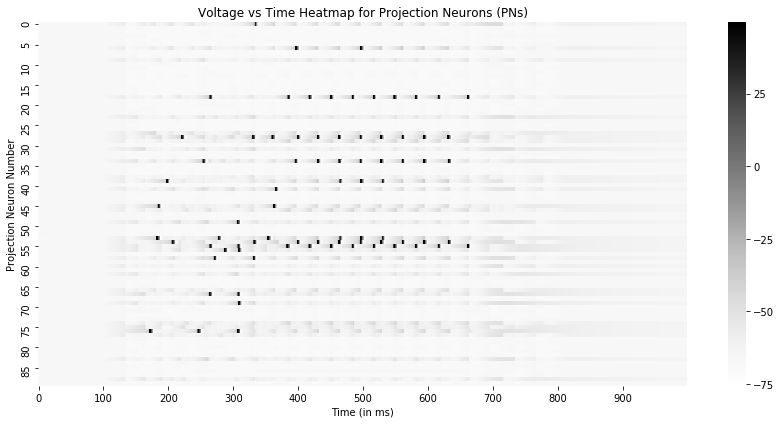

In [43]:
plt.figure(figsize=(12,6))
    
sns.heatmap(state[::100,:90].T,xticklabels=100,yticklabels=5,cmap='Greys')

plt.xlabel("Time (in ms)")
plt.ylabel("Projection Neuron Number")
plt.title("Voltage vs Time Heatmap for Projection Neurons (PNs)")

plt.tight_layout()
plt.show()

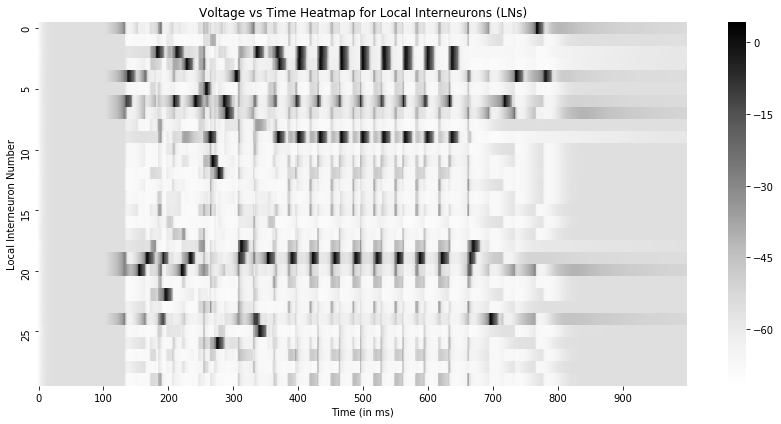

In [44]:
plt.figure(figsize=(12,6))
    
sns.heatmap(state[::100,90:120].T,xticklabels=100,yticklabels=5,cmap='Greys')

plt.xlabel("Time (in ms)")
plt.ylabel("Local Interneuron Number")
plt.title("Voltage vs Time Heatmap for Local Interneurons (LNs)")

plt.tight_layout()
plt.show()

We are now capable of making models of complex realistic networks of neurons in the brains of living organisms.

## Day 6: Optimal Mind Control

Welcome to Day 6! Now that we can simulate a model of a small network in the nervous system in the brain of an living organism, we discuss the limitations of our algorithm and try to find solutions to the problems.

### Memory Management

This TensorFlow implementation allows us to make our simulation code not only easier to read but also makes it highly parallizable and scalable across a variety of computational devices. But there are some major limitations to our system. The biggest of these issues is that despite making the simulation faster, this implementation makes it very memory intensive.

The iterators in TensorFlow do not follow the normal process of Memory Allocation and Garbage Collection. Since, TensorFlow is designed to work on sophisticated hardware like GPUs, TPUs and distributed platforms, the memory allocation is done during TensorFlow session adaptively, but the memory is NOT cleared until the python kernel has stopped execution. 

The memory used increases linearly with time as the state matrix is computed recursively by the Scan function. The maximum memory used by the computational graph is 2 times the total state matrix size at the point when the computation finishes and copies the final data into the memory. Larger and more complicated the network and longer the simulation, larger the matrix and then, each run is limited by the total available memory. As we increase the number of neurons (n) and scale the degree distributions, the size of the memory used grows ~$O(n^2)$ as the number of differential equations grows as a square of the number of neurons. Similarly, as we increase the length of the simulation(L), the memory used grows $O(L)$. Which is why for a system with a limited memory of K bytes, The length of a given simulation (L timesteps) of a given network (N differential equations) with 64-bit floating-point precision will follow: 

$$2\times64\times L\times N=K$$ 

That is, for any given network, our maximum simulation length is limited. One way to improve our maximum length is to divide the simulation into smaller batches. There will be a small queuing time between batches, which will slow down our code by a small amount but we will be able to simulate longer times. Thus, if we split the simulation into K sequential batches, the maximum memory for the simulation becomes $(1+\frac{1}{K})$ times the total matrix size. Thus the memory relation becomes:  

$$\Big(1+\frac{1}{K}\Big)\times64\times L\times N=K$$ 

This way, we can maximize the length of out simulation that we can run in a single python kernel.

Let us implement this batch system for our last model of the Locust AL.

### Recall the Model

For implementing a Batch system, we do not need to change how we construct our model only how we execute it.

#### Step 1: Perform Imports; Initialize Parameters and Dynamical Equations; Define Input

In [45]:
import tensorflow as tf
import numpy as np
import nerveflow as nv
import matplotlib.pyplot as plt
import seaborn as sns

sim_time = 1000 # simulation time (in ms)
sim_res = 0.01 # simulation resolution (in ms)

t = np.arange(0.0, sim_time, sim_res) # time array

# Defining Neuron Counts

n_n = int(120)                 # number of neurons

p_n = int(90)                  # number of PNs
l_n = int(30)                  # number of LNs

C_m  = [1.0]*n_n                     # Capacitance

# Defining Common Current Parameters #

g_K  = [10.0]*n_n                    # K conductance
g_L  = [0.15]*n_n                    # Leak conductance
g_KL  = [0.05]*p_n + [0.02]*l_n      # K leak conductance (first 90 for PNs and next 30 for LNs)

E_K  = [-95.0]*n_n                   # K Potential
E_L  = [-55.0]*p_n + [-50.0]*l_n     # Leak Potential (first 90 for PNs and next 30 for LNs)
E_KL  = [-95.0]*n_n                  # K Leak Potential

# Defining Cell Type Specific Current Parameters #

## PNs

g_Na = [100.0]*p_n                   # Na conductance
g_A  = [10.0]*p_n                    # Transient K conductance

E_Na = [50.0]*p_n                    # Na Potential
E_A  = [-95.0]*p_n                   # Transient K Potential

## LNs

g_Ca = [3.0]*l_n                     # Ca conductance
g_KCa = [0.3]*l_n                    # Ca dependent K conductance

E_Ca = [140.0]*l_n                   # Ca Potential
E_KCa = [-90]*l_n                    # Ca dependent K Potential

A_Ca = 2*(10**(-4))                  # Ca outflow rate
Ca0 = 2.4*(10**(-4))                 # Equilibrium Calcium Concentration
t_Ca = 150                           # Ca recovery time constant

## Defining Firing Thresholds ##

F_b = [0.0]*n_n                      # Fire threshold

## Defining Acetylcholine Synapse Connectivity ##

ach_mat = np.zeros((n_n,n_n))                                 # Ach Synapse Connectivity Matrix
ach_mat[p_n:,:p_n] = np.random.choice([0.,1.],size=(l_n,p_n)) # 50% probability of PN -> LN
np.fill_diagonal(ach_mat,0.)                                  # Remove all self connection

## Defining Acetylcholine Synapse Parameters ##

n_syn_ach = int(np.sum(ach_mat))     # Number of Acetylcholine (Ach) Synapses 
alp_ach = [10.0]*n_syn_ach           # Alpha for Ach Synapse
bet_ach = [0.2]*n_syn_ach            # Beta for Ach Synapse
t_max = 0.3                          # Maximum Time for Synapse
t_delay = 0                          # Axonal Transmission Delay
A = [0.5]*n_n                        # Synaptic Response Strength
g_ach = [0.35]*p_n+[0.3]*l_n         # Ach Conductance
E_ach = [0.0]*n_n                    # Ach Potential

## Defining GABAa Synapse Connectivity ##

fgaba_mat = np.zeros((n_n,n_n))                              # GABAa Synapse Connectivity Matrix
fgaba_mat[:,p_n:] = np.random.choice([0.,1.],size=(n_n,l_n)) # 50% probability of LN -> LN/PN
np.fill_diagonal(fgaba_mat,0.)                               # No self connection

## Defining GABAa Synapse Parameters ##
    
n_syn_fgaba = int(np.sum(fgaba_mat)) # Number of GABAa (fGABA) Synapses
alp_fgaba = [10.0]*n_syn_fgaba       # Alpha for fGABA Synapse
bet_fgaba = [0.16]*n_syn_fgaba       # Beta for fGABA Synapse
V0 = [-20.0]*n_n                     # Decay Potential
sigma = [1.5]*n_n                    # Decay Time Constant
g_fgaba = [0.8]*p_n+[0.8]*l_n        # fGABA Conductance
E_fgaba = [-70.0]*n_n                # fGABA Potential

## Dynamics for Gating Variables ##

def K_prop(V):
    
    T = 22
    
    phi = 3.0**((T-36.0)/10)
    
    V_ = V-(-50)
    
    alpha_n = 0.02*(15.0 - V_)/(tf.exp((15.0 - V_)/5.0) - 1.0)
    beta_n = 0.5*tf.exp((10.0 - V_)/40.0)
    
    t_n = 1.0/((alpha_n+beta_n)*phi)
    n_inf = alpha_n/(alpha_n+beta_n)
    
    return n_inf, t_n


def Na_prop(V):
    T = 22
    
    phi = 3.0**((T-36)/10)
    
    V_ = V-(-50)
    
    alpha_m = 0.32*(13.0 - V_)/(tf.exp((13.0 - V_)/4.0) - 1.0)
    beta_m = 0.28*(V_ - 40.0)/(tf.exp((V_ - 40.0)/5.0) - 1.0)
    
    alpha_h = 0.128*tf.exp((17.0 - V_)/18.0)
    beta_h = 4.0/(tf.exp((40.0 - V_)/5.0) + 1.0)
    
    t_m = 1.0/((alpha_m+beta_m)*phi)
    t_h = 1.0/((alpha_h+beta_h)*phi)
    
    m_inf = alpha_m/(alpha_m+beta_m)
    h_inf = alpha_h/(alpha_h+beta_h)
    
    return m_inf, t_m, h_inf, t_h


def A_prop(V):
    T = 36
    
    phi = 3.0**((T-23.5)/10)
    
    m_inf = 1/(1+tf.exp(-(V+60.0)/8.5))
    h_inf = 1/(1+tf.exp((V+78.0)/6.0))
    
    tau_m = 1/(tf.exp((V+35.82)/19.69) + tf.exp(-(V+79.69)/12.7) + 0.37) / phi
    
    t1 = 1/(tf.exp((V+46.05)/5.0) + tf.exp(-(V+238.4)/37.45)) / phi
    t2 = (19.0/phi) * tf.ones(tf.shape(V),dtype=V.dtype)
    tau_h = tf.where(tf.less(V,-63.0),t1,t2)
    
    return m_inf, tau_m, h_inf, tau_h


def Ca_prop(V):
    
    m_inf = 1/(1+tf.exp(-(V+20.0)/6.5))
    h_inf = 1/(1+tf.exp((V+25.0)/12))
    
    tau_m = 1.5
    tau_h = 0.3*tf.exp((V-40.0)/13.0) + 0.002*tf.exp((60.0-V)/29)
    
    return m_inf, tau_m, h_inf, tau_h

def KCa_prop(Ca):
    T = 26
    
    phi = 2.3**((T-23.0)/10)
    
    alpha = 0.01*Ca
    beta = 0.02
    
    tau = 1/((alpha+beta)*phi)
    
    return alpha*tau*phi, tau

## NEURONAL CURRENTS ##

## Common Currents ##

def I_K(V, n):
    return g_K  * n**4 * (V - E_K)

def I_L(V):
    return g_L * (V - E_L)

def I_KL(V):
    return g_KL * (V - E_KL)

## PN Currents ##

def I_Na(V, m, h):
    return g_Na * m**3 * h * (V - E_Na)

def I_A(V, m, h):
    return g_A * m**4 * h * (V - E_A)

## LN Currents ##

def I_Ca(V, m, h):
    return g_Ca * m**2 * h * (V - E_Ca)

def I_KCa(V, m):
    T = 26
    phi = 2.3**((T-23.0)/10)
    return g_KCa * m * phi * (V - E_KCa)

## SYNAPTIC CURRENTS ##

def I_ach(o,V):
    o_ = tf.Variable([0.0]*n_n**2,dtype=tf.float64)
    ind = tf.boolean_mask(tf.range(n_n**2),ach_mat.reshape(-1) == 1)
    o_ = tf.scatter_update(o_,ind,o)
    o_ = tf.transpose(tf.reshape(o_,(n_n,n_n)))
    return tf.reduce_sum(tf.transpose((o_*(V-E_ach))*g_ach),1)

def I_fgaba(o,V):
    o_ = tf.Variable([0.0]*n_n**2,dtype=tf.float64)
    ind = tf.boolean_mask(tf.range(n_n**2),fgaba_mat.reshape(-1) == 1)
    o_ = tf.scatter_update(o_,ind,o)
    o_ = tf.transpose(tf.reshape(o_,(n_n,n_n)))
    return tf.reduce_sum(tf.transpose((o_*(V-E_fgaba))*g_fgaba),1)

## INPUT CURRENTS ##

def I_inj_t(t):
    return tf.constant(current_input.T,dtype=tf.float64)[tf.to_int32(t*100)]

## Dynamical Differential Equations ##

def dAdt(X, t): # X is the state vector
    
    V_p   = X[0   : p_n] # Voltage(PN)
    V_l   = X[p_n : n_n] # Voltage(LN)
    
    n_K   = X[n_n : 2*n_n] # K-gating(ALL)
    
    m_Na  = X[2*n_n : 2*n_n + p_n] # Na-activation-gating(PN)
    h_Na  = X[2*n_n + p_n : 2*n_n + 2*p_n] # Na-inactivation-gating(PN)

    m_A   = X[2*n_n + 2*p_n : 2*n_n + 3*p_n] # Transient-K-activation-gating(PN)
    h_A   = X[2*n_n + 3*p_n : 2*n_n + 4*p_n] # Transient-K-inactivation-gating(PN)
    
    m_Ca  = X[2*n_n + 4*p_n : 2*n_n + 4*p_n + l_n] # Ca-activation-gating(LN)
    h_Ca  = X[2*n_n + 4*p_n + l_n: 2*n_n + 4*p_n + 2*l_n] # Ca-inactivation-gating(LN)
    
    m_KCa = X[2*n_n + 4*p_n + 2*l_n : 2*n_n + 4*p_n + 3*l_n] # K(Ca)-gating(LN)
    Ca    = X[2*n_n + 4*p_n + 3*l_n: 2*n_n + 4*p_n + 4*l_n] # Ca-concentration(LN)

    o_ach = X[6*n_n : 6*n_n + n_syn_ach] # Acetylcholine Open Fraction
    o_fgaba = X[6*n_n + n_syn_ach : 6*n_n + n_syn_ach + n_syn_fgaba] # GABAa Open Fraction
    
    fire_t = X[-n_n:] # Fire-times
    
    V = X[:n_n] # Overall Voltage (PN + LN)
    
    
    # Evaluate Differentials for Gating variables and Ca concentration
    
    n0,tn = K_prop(V)
    
    dn_k = - (1.0/tn)*(n_K-n0)
    
    m0,tm,h0,th = Na_prop(V_p)
    
    dm_Na = - (1.0/tm)*(m_Na-m0)
    dh_Na = - (1.0/th)*(h_Na-h0)
    
    m0,tm,h0,th = A_prop(V_p)
    
    dm_A = - (1.0/tm)*(m_A-m0)
    dh_A = - (1.0/th)*(h_A-h0)
    
    m0,tm,h0,th = Ca_prop(V_l)
    
    dm_Ca = - (1.0/tm)*(m_Ca-m0)
    dh_Ca = - (1.0/th)*(h_Ca-h0)
    
    m0,tm = KCa_prop(Ca)
    
    dm_KCa = - (1.0/tm)*(m_KCa-m0)
    
    dCa = - A_Ca*I_Ca(V_l,m_Ca,h_Ca) - (Ca - Ca0)/t_Ca
    
    # Evaluate differential for Voltage
    
    # The dynamical equation for voltage has both unique and common parts.
    # Thus, as discussed above, we first evaluate the unique parts of Cm*dV/dT for LNs and PNs.
    
    CmdV_p = - I_Na(V_p, m_Na, h_Na) - I_A(V_p, m_A, h_A)
    CmdV_l = - I_Ca(V_l, m_Ca, h_Ca) - I_KCa(V_l, m_KCa)
    
    # Once we have that, we merge the two into a single 120-vector.
    
    CmdV = tf.concat([CmdV_p,CmdV_l],0)
    
    # Finally we add the common currents and divide by Cm to get dV/dt.
    
    dV = (I_inj_t(t) + CmdV - I_K(V, n_K) - I_L(V) - I_KL(V) - \
          I_ach(o_ach,V) - I_fgaba(o_fgaba,V)) / C_m
    
    # Evaluate dynamics in synapses
    
    A_ = tf.constant(A,dtype=tf.float64)
    T_ach = tf.where(tf.logical_and(tf.greater(t,fire_t+t_delay),tf.less(t,fire_t+t_max+t_delay)),\
                     A_,tf.zeros(tf.shape(A_),dtype=A_.dtype))
    T_ach = tf.multiply(tf.constant(ach_mat,dtype=tf.float64),T_ach)
    T_ach = tf.boolean_mask(tf.reshape(T_ach,(-1,)),ach_mat.reshape(-1) == 1)
    do_achdt = alp_ach*(1.0-o_ach)*T_ach - bet_ach*o_ach
    
    T_fgaba = 1.0/(1.0+tf.exp(-(V-V0)/sigma))
    T_fgaba = tf.multiply(tf.constant(fgaba_mat,dtype=tf.float64),T_fgaba)
    T_fgaba = tf.boolean_mask(tf.reshape(T_fgaba,(-1,)),fgaba_mat.reshape(-1) == 1)
    do_fgabadt = alp_fgaba*(1.0-o_fgaba)*T_fgaba - bet_fgaba*o_fgaba
    
    # Set change in fire-times as zero
    
    dfdt = tf.zeros(tf.shape(fire_t),dtype=fire_t.dtype)

    # Combine to a single vector
    
    out = tf.concat([dV,         dn_k,
                     dm_Na,      dh_Na,
                     dm_A,       dh_A,
                     dm_Ca,      dh_Ca,
                     dm_KCa,     
                     dCa,        do_achdt,
                     do_fgabadt, dfdt   ],0)
    return out

## Defining Current Input ##

current_input = np.zeros((n_n,t.shape[0]))

# Create the input shape

y = np.where(t<600,(1-np.exp(-(t-100)/75)),0.9996*np.exp(-(t-600)/150))
y = np.where(t<100,np.zeros(t.shape),y)

# Randomly choose 33% indices from 120

p_input = 0.33
input_neurons = np.random.choice(np.array(range(n_n)),int(p_input*n_n),replace=False)

# Assign input shape to chosen indices

current_input[input_neurons,:]= 10*y

#### Step 2: Define the Initial Condition of the Network

In [46]:
state_vector =  [-70]* n_n + [0.0]* (n_n + 4*p_n + 3*l_n) + [2.4*(10**(-4))]*l_n + [0]*(n_syn_ach+n_syn_fgaba) + [-(sim_time+1)]*n_n
state_vector = np.array(state_vector)
state_vector = state_vector + 0.01*state_vector*np.random.normal(size=state_vector.shape)
init_state = tf.constant(state_vector, dtype=tf.float64)

#### Step 3: Splitting Time Series into independent batches and Run Each Batch Sequentially

Since we will be dividing the computation into batches, we have to split the time array into batches which will be passed to the each successive call to the integrator. For each new call, the last state vector of the last call will be the new initial condition.

In [47]:
# Define the Number of Batches
n_batch = 2

# Split t array into batches using numpy
t_batch = np.array_split(t,n_batch)

# Iterate over the batches of time array
for n,i in enumerate(t_batch):
    
    # Inform start of Batch Computation
    print("Batch",(n+1),"Running...",end="")
    
    # In np.array_split(), the split edges are present in only one array and since 
    # our initial vector to successive calls is corresposnding to the last output
    # our first element in the later time array should be the last element of the 
    # previous output series, Thus, we append the last time to the beginning of 
    # the current time array batch.
    if n>0:
        i = np.append(i[0]-sim_res,i)
    
    # Set state_vector as the initial condition
    init_state = tf.constant(state_vector, dtype=tf.float64)
    # Create the Integrator computation graph over the current batch of t array
    tensor_state = nv.odeint(dAdt, init_state, i, n_n, F_b)
    
    # Initialize variables and run session
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        state = sess.run(tensor_state)
        sess.close()
    
    # Reset state_vector as the last element of output
    state_vector = state[-1,:]
    
    # Save the output of the simulation to a binary file
    np.save("part_"+str(n+1),state)

    # Clear output
    state=None
    
    print("Finished")

Batch 1 Running...Finished
Batch 2 Running...Finished


#### Putting the Output Together

The output from our batch implementation is a set of binary files that store subparts of our total simulation. To get the overall output we have to stitch them back together.

In [48]:
overall_state = []

# Iterate over the generated output files
for n,i in enumerate(["part_"+str(n+1)+".npy" for n in range(n_batch)]):
    
    # Since the first element in the series was the last output, we remove them
    if n>0:
        overall_state.append(np.load(i)[1:,:])
    else:
        overall_state.append(np.load(i))

# Concatenate all the matrix to get a single state matrix
overall_state = np.concatenate(overall_state)

#### Visualizing the Overall Data
Finally, we plot the voltage traces of the PNs (Neurons 0 to 89) and LNs (Neurons 90 to 119) as a Voltage vs Time heatmap.

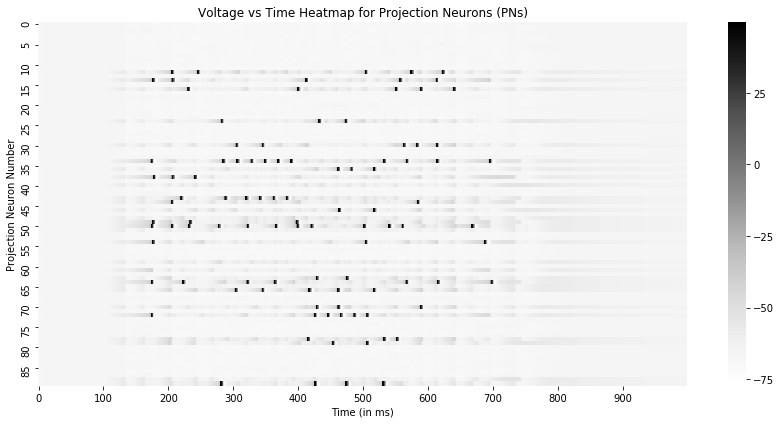

In [49]:
plt.figure(figsize=(12,6))
    
sns.heatmap(overall_state[::100,:90].T,xticklabels=100,yticklabels=5,cmap='Greys')

plt.xlabel("Time (in ms)")
plt.ylabel("Projection Neuron Number")
plt.title("Voltage vs Time Heatmap for Projection Neurons (PNs)")

plt.tight_layout()
plt.show()

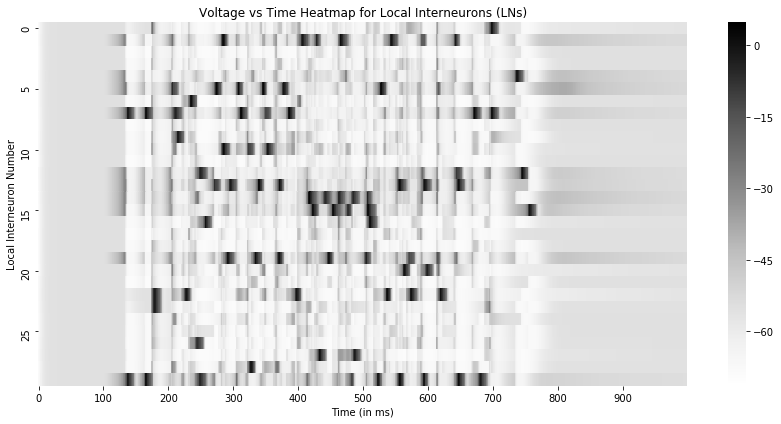

In [50]:
plt.figure(figsize=(12,6))
    
sns.heatmap(overall_state[::100,90:120].T,xticklabels=100,yticklabels=5,cmap='Greys')

plt.xlabel("Time (in ms)")
plt.ylabel("Local Interneuron Number")
plt.title("Voltage vs Time Heatmap for Local Interneurons (LNs)")

plt.tight_layout()
plt.show()

By this method, we have maximized the usage of our available memory but we can go further and develop a method to allow indefinitely long simulation. The issue behind this entire algorithm is that the memory is not cleared until the python kernel finishes. One way to overcome this is to save the parameters of the model (such as connectivity matrix) and the state vector in a file, and start a new python kernel from a python script to compute successive batches. This way after each large batch, the memory gets cleaned. By combining the previous batch implementation and this system, we can maximize our computability.

### Implementing a Runner and a Caller

Firstly, we have to create an implementation of the model that takes in previous input as current parameters. Thus, we create a file, which we call "run.py" that takes an argument ie. the current batch number. The implementation for "run.py" is mostly same as the above model but there is a small difference.

When the batch number is 0, we initialize all variable parameters and save them, but otherwise we use the saved values. The parameters we save include: Acetylcholine Matrix, GABAa Matrix and Final/Initial State Vector. It will also save the files with both batch number and sub-batch number listed.

The time series will be created and split initially by the caller, which we call "call.py", and stored in a file. Each execution of the Runner will extract its relevant time series and compute on it.

#### Implementing the Caller code

The caller will create the time series, split it and use python subprocess module to call "run.py" with appropriate arguments. The code for "call.py" is given below.

In [51]:
from subprocess import call
import numpy as np

total_time = 1000
n_splits = 2
time = np.split(np.arange(0,total_time,0.01),n_splits)

# Append the last time point to the beginning of the next batch
for n,i in enumerate(time):
    if n>0:
        time[n] = np.append(i[0]-0.01,i)

np.save("time",time)

# call successive batches with a new python subprocess and pass the batch number
for i in range(n_splits):
    call(['python','run.py',str(i)])

print("Simulation Completed.")

#### Implementing the Runner code

"run.py" is essentially identical to the batch-implemented model we developed above with the changes described below:

In [52]:
# Additional Imports #

import sys

# Duration of Simulation #

#t = np.arange(0.0, sim_time, sim_res)        
t = np.load("time.npy")[int(sys.argv[1])] # get first argument to run.py

# Connectivity Matrix Definitions #

if sys.argv[1] == '0':
    ach_mat = np.zeros((n_n,n_n))                                 # Ach Synapse Connectivity Matrix
    ach_mat[p_n:,:p_n] = np.random.choice([0.,1.],size=(l_n,p_n)) # 50% probability of PN -> LN
    np.fill_diagonal(ach_mat,0.)                                  # Remove all self connection
    np.save("ach_mat",ach_mat)
else:
    ach_mat = np.load("ach_mat.npy")
    
if sys.argv[1] == '0':
    fgaba_mat = np.zeros((n_n,n_n))                              # GABAa Synapse Connectivity Matrix
    fgaba_mat[:,p_n:] = np.random.choice([0.,1.],size=(n_n,l_n)) # 50% probability of LN -> LN/PN
    np.fill_diagonal(fgaba_mat,0.)                               # No self connection
    np.save("fgaba_mat",fgaba_mat)
else:
    fgaba_mat = np.load("fgaba_mat.npy")

# State Vector Definition #

if sys.argv[1] == '0':
    state_vector =  [-70]* n_n + [0.0]* n_n + [0.0]* (4*p_n) + [0.0]* (3*l_n) + [2.4*(10**(-4))]*l_n + [0]*(n_syn_ach) + [0]*(n_syn_fgaba) + [-(sim_time+1)]*n_n
    state_vector = np.array(state_vector)
    state_vector = state_vector + 0.01*state_vector*np.random.normal(size=state_vector.shape)
    np.save("state_vector",state_vector)
else:
    state_vector = np.load("state_vector.npy")

# Saving of Output #

# np.save("part_"+str(n+1),state)
# np.save("batch"+str(int(sys.argv[1])+1)+"_part_"+str(n+1),state)

#### Combining all Data

Just like we merged all the batches, we merge all the sub-batches and batches.

In [53]:
overall_state = []

# Iterate over the generated output files
for n,i in enumerate(["batch_"+str(x+1) for x in range(n_splits)]):
    for m,j in enumerate(["_part_"+str(x+1)+".npy" for x in range(n_batch)]):
    
        # Since the first element in the series was the last output, we remove them
        if n>0 and m>0:
            overall_state.append(np.load(i)[1:,:])
        else:
            overall_state.append(np.load(i))

# Concatenate all the matrix to get a single state matrix
overall_state = np.concatenate(overall_state)

### Other Limitations

With the runner-caller implementation, we have solved the issue of memory limitation. But there are some issues we havent solved yet.

1. **Delay Dependent Activity:** If the implementation of an model requires a delay differential equation (DDEs) that accesses the value of the parameters at a earlier time, we cannot use this programming paradigm directly as it has only, at most, one timestep memory. This is also a limitation of using the scan function. Exploring alternatives to tf.scan() and other techniques of solving DDEs is an option.

2. **Optimal Distributed Computing:** To maximize the utility of distributed systems, the algorithm needs to be capable of splitting the computation into tasks that can be run parallely (simultaneously) in different computational units. Since we are working with numerical integration, the results of the last step need to be known to perform the next computation. This, in a way limits out ability to use distributed computing. TensorFlow automatically tries to utilize all available resources efficiently but it may not be the optimal usage. One way to enforce distribution is to manually distribute parts of the computational graph to specialized computing units. For example, the actual session can be forced to be executed on the server with maximum memory but the sub-computations such as the RK4 integration steps can be distributed to servers with more GPUs.